 # Detecting the Credit Card Fraud
This project is about analysing a credit card fraud dataset to draw importance in the variables and predict the future credit card fraud. Before formally analysing, it is crucial to understand the followings.
 ## Variables
The whole dataset contains 31 variables. One of them is the dependent variable, which is **Class**. This variable is binary, which means it only take the values of 0 or 1, where 1 represents a fraud and 0 represents a nonfraud. Other 30 variables are independent variables, which contain **Time**, **Amount**, and **V1** to **V28**. The feature **Time** contains the seconds elapsed between transaction and the first transaction in the dataset. The feature **Amount** represents the transaction amount. Although **Time** and **Amount** should be continuous variables theoretically, they are discrete in the dataset. The variable **Time** has unit of 0.1 seconds and the variable **Amount** has unit of 0.01. The continuous variables **V1** to **V28** repesent other features for a typical transaction, but the names are not shown because of confidential reasons.  
 ## Imbalanced Dataset
We should note that this dataset is highly imbalanced. The dependent variable **Class** has much more values of 0s than 1s. In other word, the dataset contains much more instances of nonfraud than instances of fraud. Imbalanced dataset is problematic because when we perform regression or classification models, the models will be inefficient (or inaccurate) in predicting the coefficients of the variables. We will discuss this later in our analysis.
 ## Logistic Regression
Logistic regression is a desire candidate for analysing problems with binary dependent variables. The reason that multiple linear regression is not a good choice in analysing data with binary dependent variables is that the predicted value represents the probability of the dependant variable of an instance being 1. Mathematically, 
$$y(\textbf{x}, \theta) = Pr(Y = 1 | \textbf{x}, \theta)$$
where $y(\textbf{x}, \theta)$ is the regression function, $\textbf{x}$ represents the variables in a certain instance, and $\theta$ is the predicted coefficients of independent variables. In multiple linear regression, the regression can take values that are less than zero or larger than one. The result therefore disobeys the axioms of probability. 

However, the logistic regression does not have such a problem. The regression function of a logistic regression can be represented as follow:
$$y(\textbf{x}, \boldsymbol{\theta}) = \frac{1}{1+e^{- \textbf{x} \cdot \boldsymbol{\theta}}}$$
where $\textbf{x}$ is the vector $(1, x_1, x_2, ..., x_n)$ and $\boldsymbol{\theta}$ is the vector $(\theta_0, \theta_1, ..., \theta_n)$. We can notice easily that if $\boldsymbol{\theta}$ is non-zero and bound, the regression function tends to 0 when $\textbf{x}$ tends to $-\infty$ and the regression function tends to 1 when $\textbf{x}$ tends to $\infty$. This property of the logistic function makes it reasonable for predicting a dataset with binary dependent variable. We therefore aim to find the the vector of coefficients $\boldsymbol{\theta}$ as accuratly as possible. 
 ## Decision Tree Classifier
 Decision tree classifier (DTC) is a supervised machine learning algorithm that assigns data points into categories, which, in our case, there are two categories, fraud and nonfraud. The DTC works by iteratively seperating the dataset into sub-datasets based on the values of selected features. The first feature selected creates the root node. The end points, where no iterations can be performed anymore, are called the leaf nodes. The decision of breaking the iteration depends on several varaibles, such as maximum tree depth, minimum samples per leaf, and minimum impurity decrease. We will discuss this in detail in the later sections. Decision tree can be visualised and, therefore, it is easy for one to understand the decision process. It is also powerful since it can capture complex relationship in data. However, it can be prone to overfitting, which is a major challenge in performing a DTC. This issue need to prevented by limiting the tree depth and putting a threshold on the samples in the leaf nodes.

# Basic Information of the Dataset
We first import the packages we will be using. Package pandas is for manipulating dataset, packages numpy, math, and scipy are for mathematics and statistics, packages matplotlib and seaborn are for plotting and visualisation, and package sklean is for machine learning algorithms.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from scipy.stats import norm

We import the data file.

In [2]:
df = pd.read_csv('creditcard.csv')

## Variable Distribution
We visualize the dataset by displaying the first 5 rows. All these 5 instances belong to the category of nonfraud.

In [3]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

We display the variables of our dataset. The variables are **Time**, **Amount**, **V1** to **V28**, and **Class**.

In [4]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


We can then show the basic information, such as the mean, standard deviation, and percentiles of all the variables. The mean and standard deviation of variables **Time** and **Amount** are much larger than the variables **V1** to **V28**. By looking at the information in **Class**, we see that the dataset contains total 284807 instances and only 0.1727% of them are fraud instances. We therefore have an idea of how imbalanced our dataset is.

In [5]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

We then check if there is null in the dataset. fortunately, there is no null data point in the dataset.

In [6]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


We plot the histgrams for all the variables to get further insights about them. Most of the variables are skewed or have an arbitrary distribution 'shape' rather than normal distribution. 

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4400/3513902229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4400/3513902229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/mp/yc2_4qzn1nbg

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4400/3513902229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4400/3513902229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/mp/yc2_4qzn1nbg

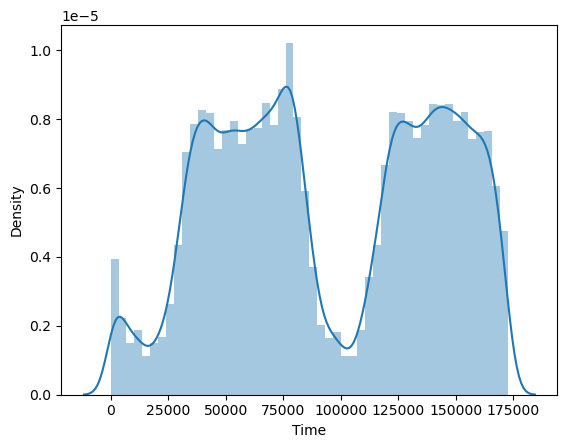

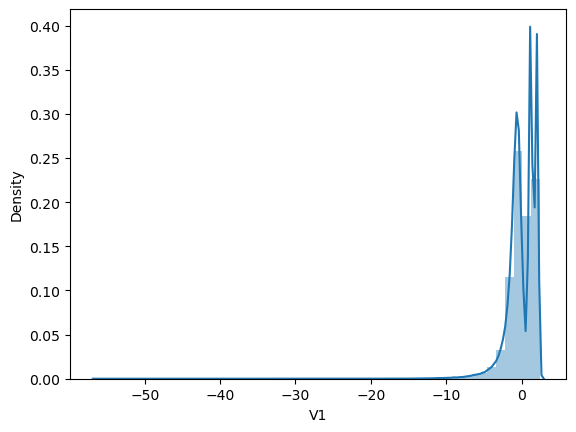

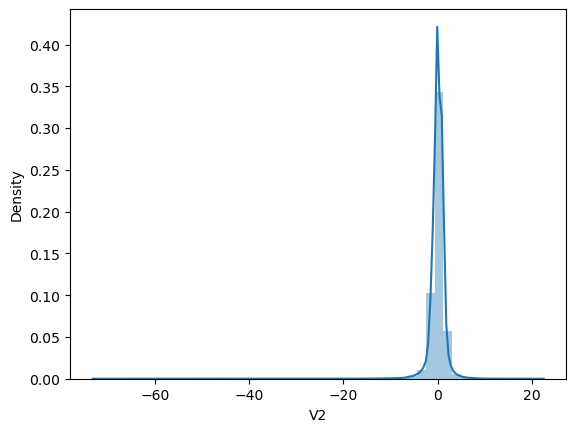

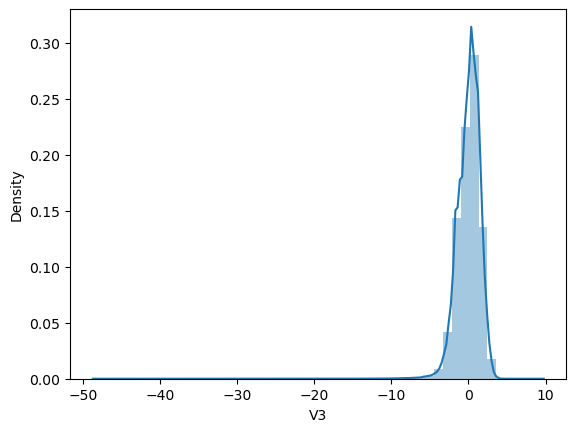

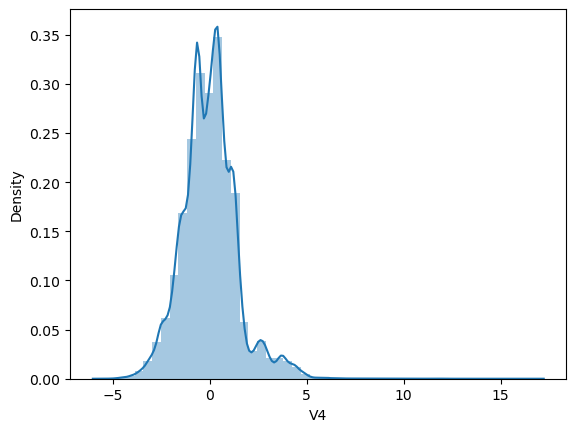

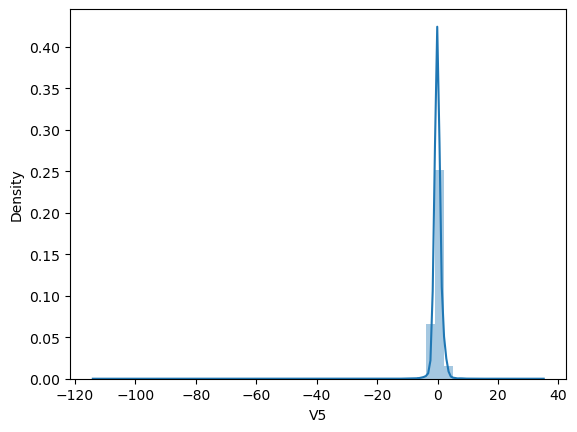

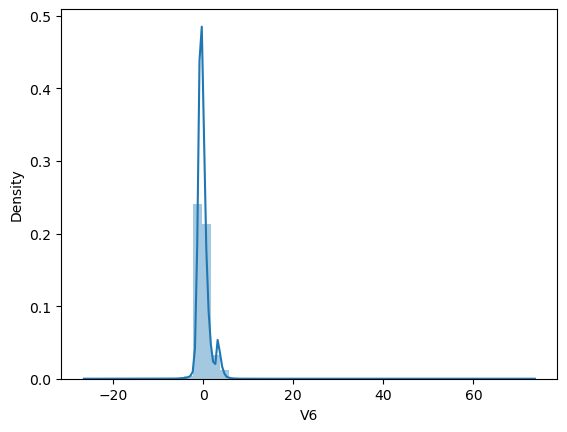

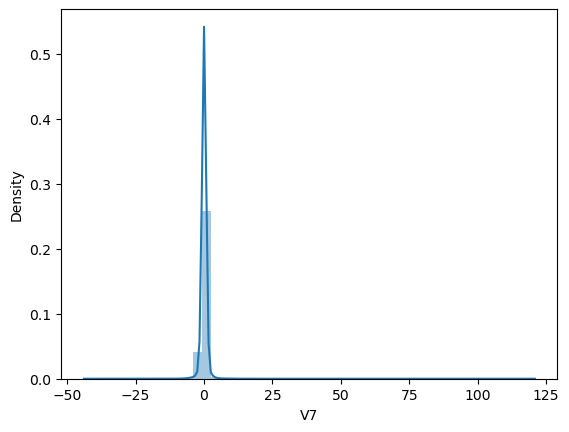

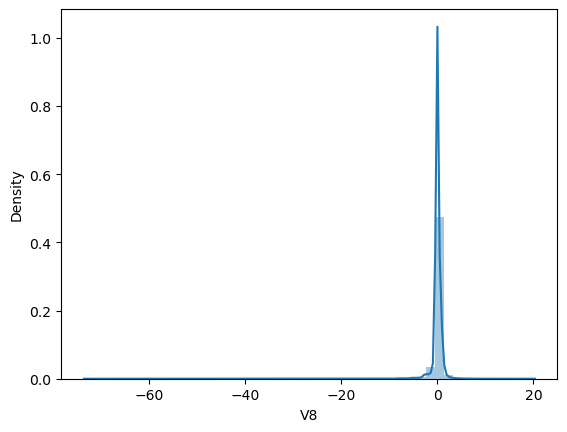

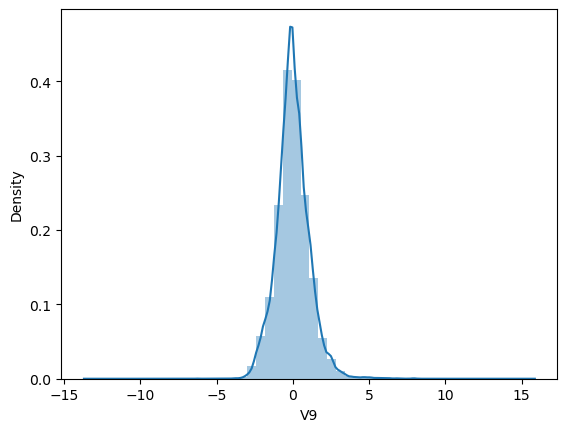

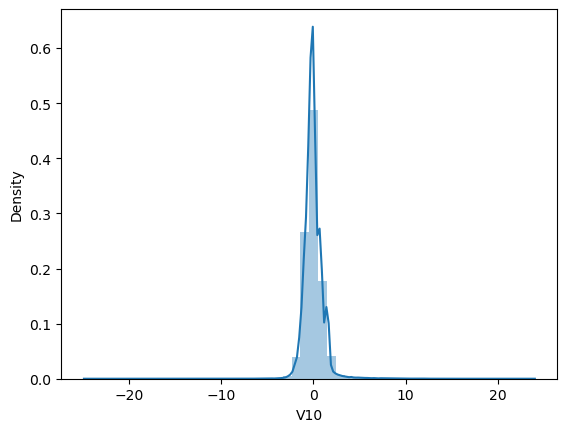

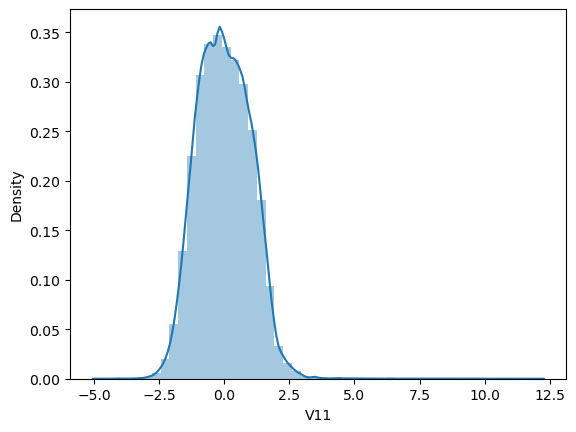

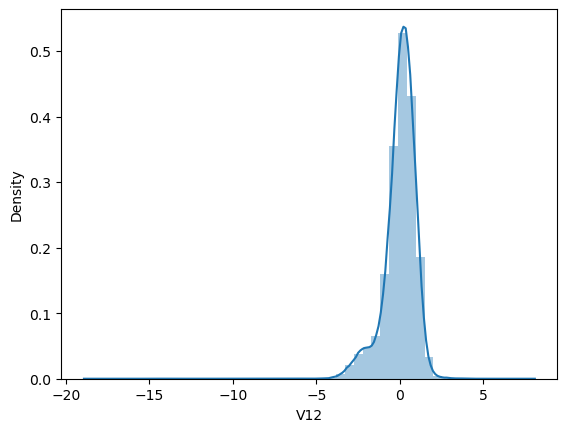

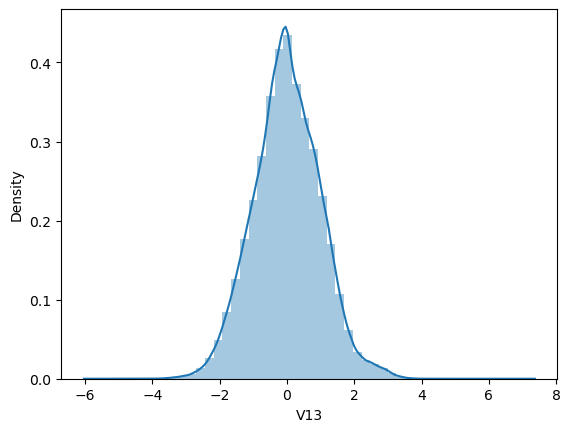

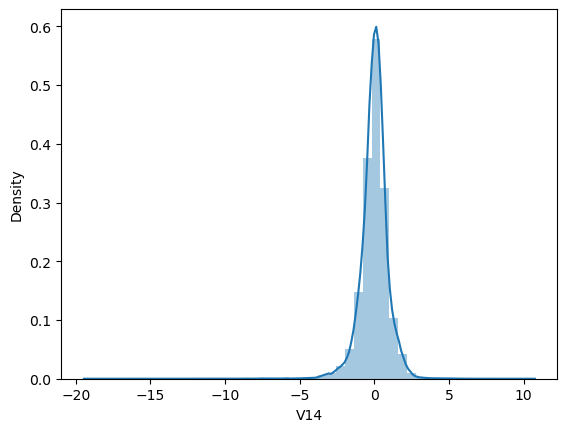

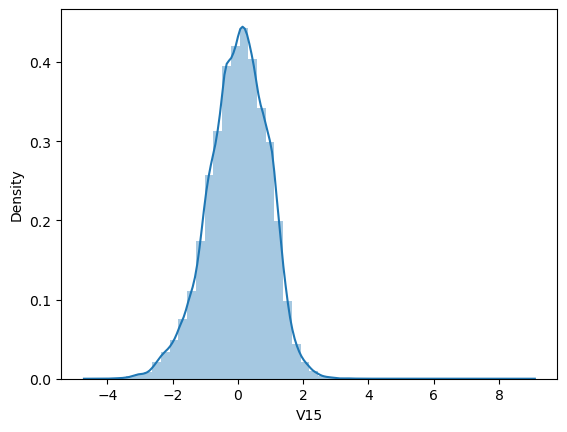

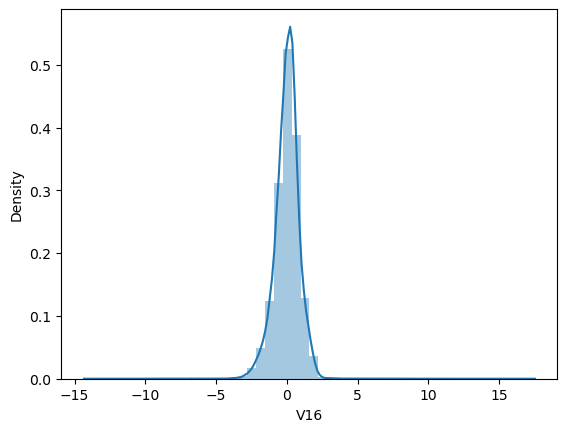

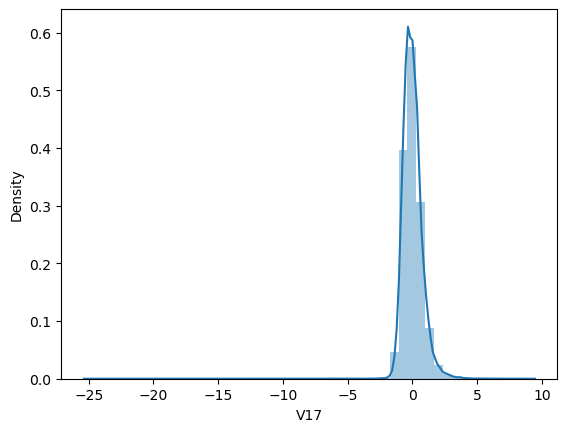

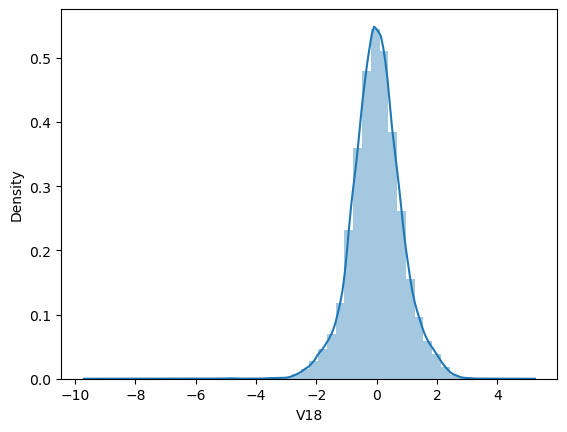

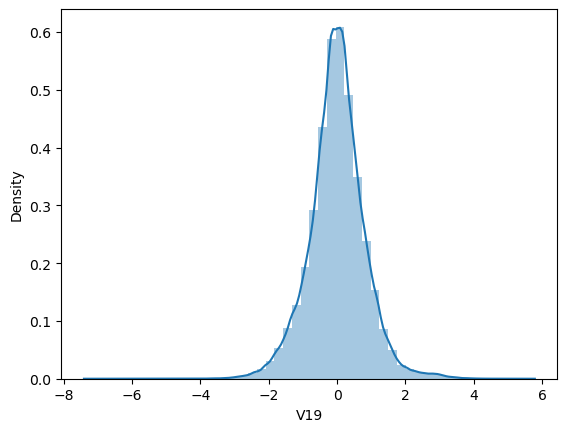

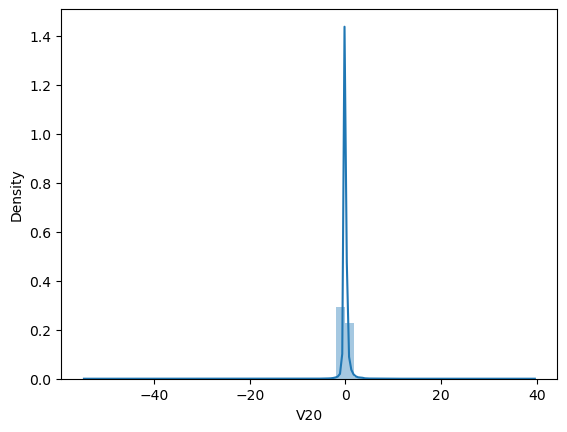

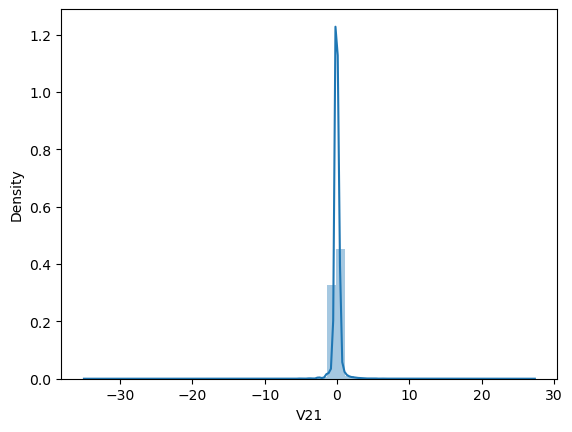

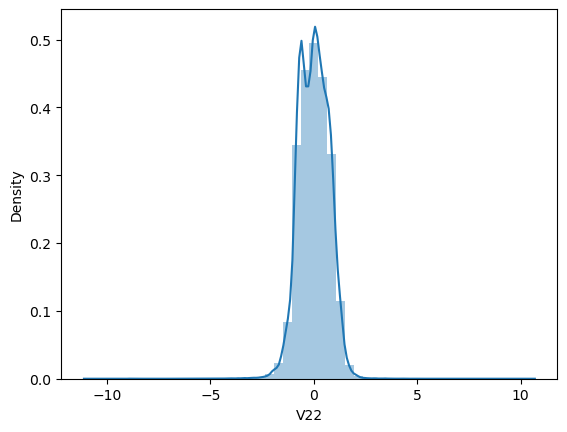

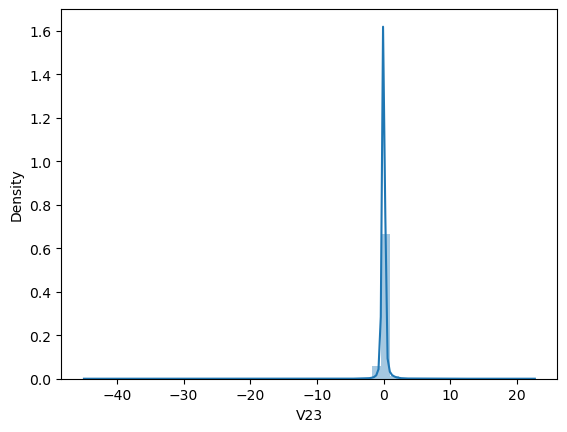

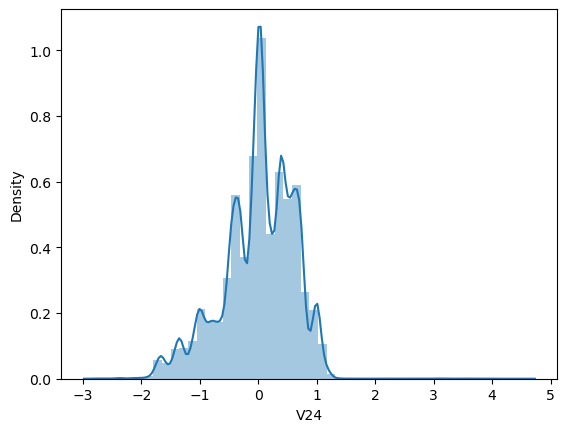

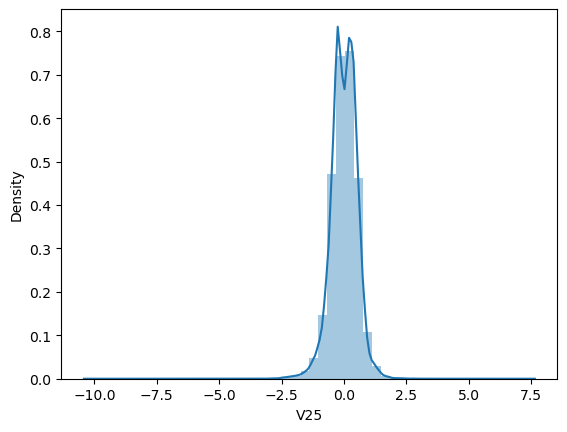

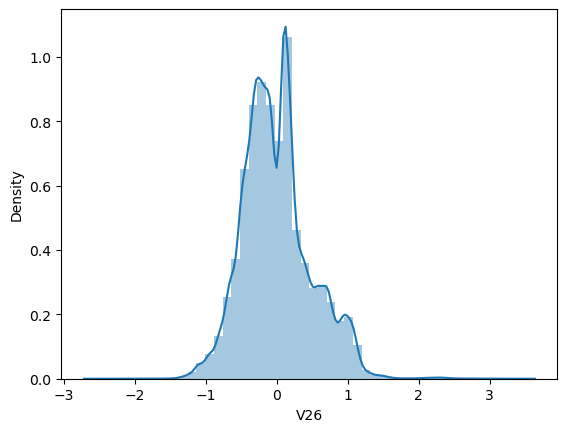

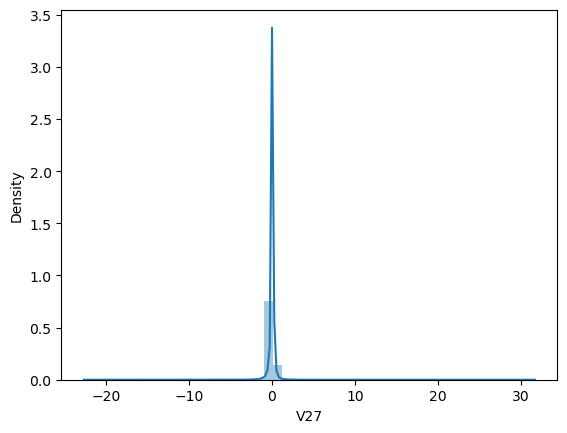

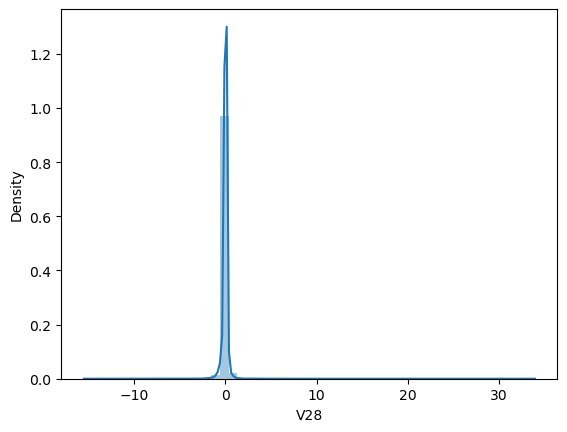

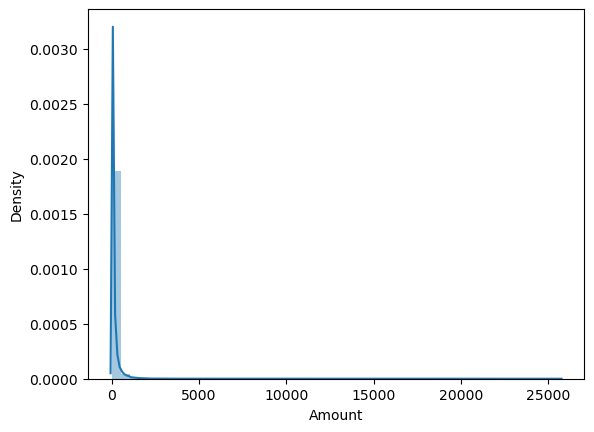

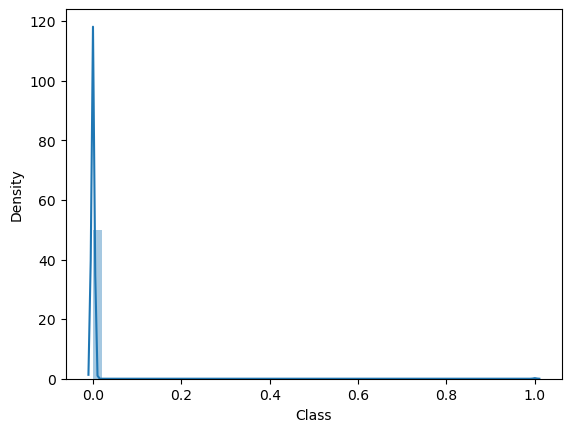

<Figure size 640x480 with 0 Axes>

In [7]:
for i in df.columns:
    sns.distplot(df[i])
    fig = plt.figure()

We see if the skewness can be removed from the variable **Amount** by taking a log on amount. However, this distribution is still unclear.

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4400/266639815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Amount'].replace(0,0.01)))


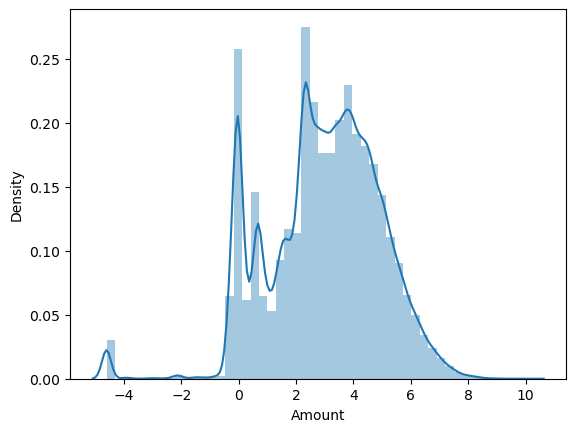

<Figure size 640x480 with 0 Axes>

In [8]:
sns.distplot(np.log(df['Amount'].replace(0,0.01)))
fig = plt.figure()

We can display the proportion of 0s in each of the variables. The propotion of 0s in **Class** is 99.8273%, which represents that 99.8273% of the instances are nonfraud. We can also see that there are 0.0007% instances that have time 0 and there are 0.6408% instances that have 0 transaction amount.

In [9]:
count = len(df['Class'])
print(df[df == 0].count(axis = 0)/count)

Time      0.000007
V1        0.000000
V2        0.000000
V3        0.000000
V4        0.000000
V5        0.000000
V6        0.000000
V7        0.000000
V8        0.000000
V9        0.000000
V10       0.000000
V11       0.000000
V12       0.000000
V13       0.000000
V14       0.000000
V15       0.000000
V16       0.000000
V17       0.000000
V18       0.000000
V19       0.000000
V20       0.000000
V21       0.000000
V22       0.000000
V23       0.000000
V24       0.000000
V25       0.000000
V26       0.000000
V27       0.000000
V28       0.000000
Amount    0.006408
Class     0.998273
dtype: float64


We plot the scatter plots among three variables **Time**, **Amount**, and **Class** and try to find if there are any obvious relations among them. We then discover that no fraud has been dicsovered when transaction amount larger than 5000. From the plots, we did not find any explicity relationship between **Time** and **Class** or between **Time** and **Amount**.

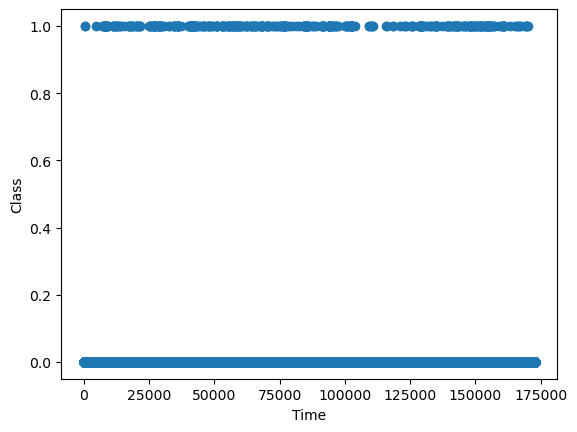

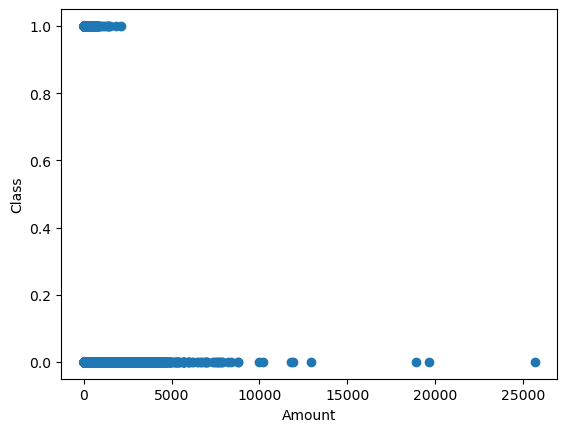

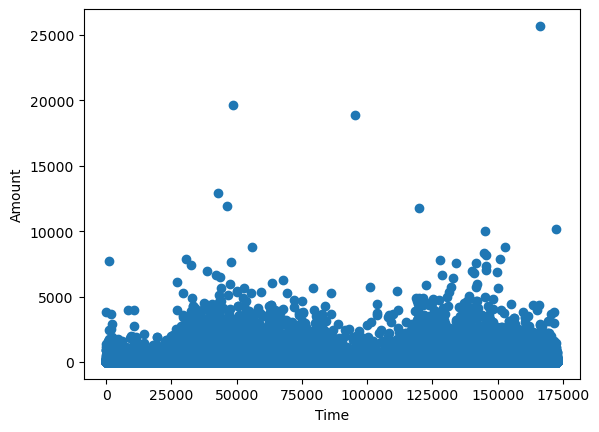

In [10]:
Time = df['Time'].tolist()
Amount = df['Amount'].tolist()
Class = df['Class'].tolist()

plt.scatter(Time, Class)
plt.xlabel('Time')
plt.ylabel('Class')
plt.show()
plt.scatter(Amount, Class)
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()
plt.scatter(Time, Amount)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

## Correlation Matrix
We then display the correlation matrix between variables. The correlation matrix is a matrix that displays the correlation ($corr(X, Y) = \frac{Cov(X, Y)}{\sqrt{Var(X)Var(Y)}}$) of each every combination of two variables. It is symmetric, obviously, and its elements range from -1 to 1. The diagonal elements of the matrix are always 1, as the correlation of a variable with its self is always 1. The absolute value of the correlation tells us how related the two variables are. High absolute value of the correlation may cause multilinearity issue in performing regression. 

The following is the correlation matrix heatmap for our dataset. We can see that most of the variables are unrelated and the correlation matrix is inefficient to find relations between variables. This is because the dataset is highly imbalanced. The instances of nonfraud dominate the instances of fraud. Therefore, imagine that if we create a random synthesised instance, where variables are independently chosen, it will highly likely be a nonfraud instance. This is exactly the reason that the correlations between variables are close to 0, as the dataset contains most datapoints where variables are independently chosen.

<Axes: >

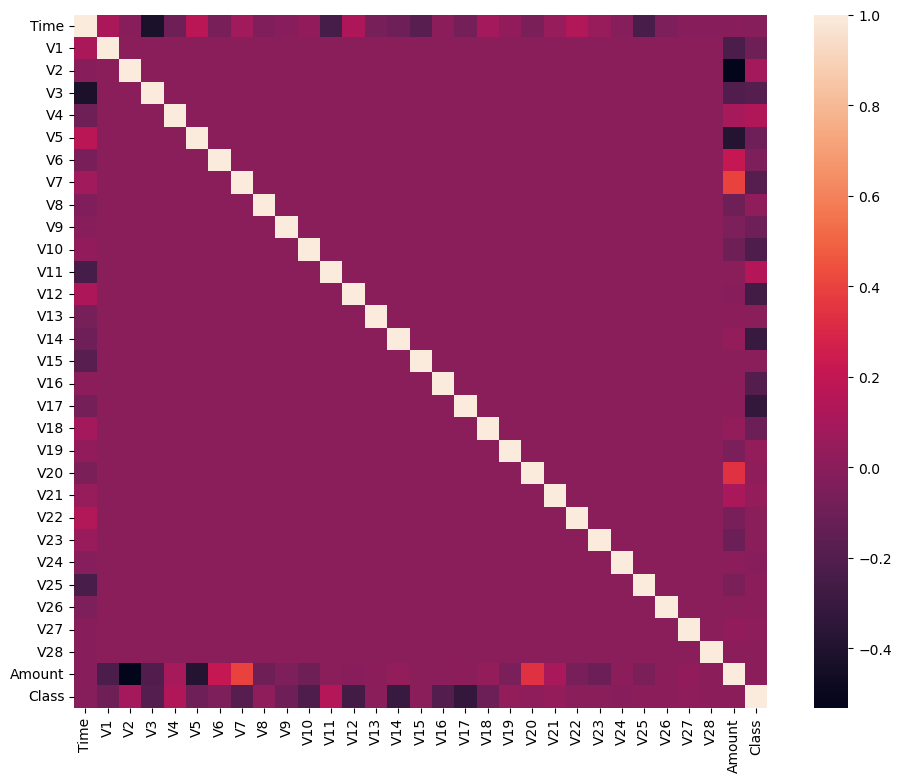

In [11]:
correlation_matrix = df.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(correlation_matrix, square = True)

# Rescale the Dataset
As we have seen before, the mean, variance, and quartiles show large difference among variables. It is essential to rescale the dataset. The reasons for rescaling are the followings:
- **Improved model performance** Rescaling variables can improve model's efficiency. 
- **Interpretability** The relative importance among variables can only be compared after rescaling.
- **Regularization** Many regularization algorithms, such as l1 and l2 regularization, which we will discuss in detail when we perform logistic regression, require the variables to be scaled.

The reason that Standard Scaler is not a good choice is that most of the variables are not normal and contain outliers. Therefore, we choose the Robust Scaler, which is suitable to deal with the variables that are not normally distributed and contain outliers.

We first create a list of indices, which will be the new variables in the rescaled dataframe.

In [12]:
from sklearn.preprocessing import RobustScaler

In [13]:
stradd = 'Scaled_'
new_df_columns = []
for i in df.columns[:-1]:
    new_index = stradd + i
    new_df_columns.append(new_index)
print(new_df_columns)

['Scaled_Time', 'Scaled_V1', 'Scaled_V2', 'Scaled_V3', 'Scaled_V4', 'Scaled_V5', 'Scaled_V6', 'Scaled_V7', 'Scaled_V8', 'Scaled_V9', 'Scaled_V10', 'Scaled_V11', 'Scaled_V12', 'Scaled_V13', 'Scaled_V14', 'Scaled_V15', 'Scaled_V16', 'Scaled_V17', 'Scaled_V18', 'Scaled_V19', 'Scaled_V20', 'Scaled_V21', 'Scaled_V22', 'Scaled_V23', 'Scaled_V24', 'Scaled_V25', 'Scaled_V26', 'Scaled_V27', 'Scaled_V28', 'Scaled_Amount']


We then perform the robust scaling to each independent variable in the dataset.

In [14]:
df1 = df[df.columns[:-1]]
Scaled_df = RobustScaler().fit_transform(df1.to_numpy())
Scaled_df = pd.DataFrame(Scaled_df, columns = new_df_columns)
Scaled_df['Class'] = Class
print(Scaled_df.head())

   Scaled_Time  Scaled_V1  Scaled_V2  Scaled_V3  Scaled_V4  Scaled_V5  \
0    -0.994983  -0.616237  -0.098602   1.228905   0.878152  -0.217859   
1    -0.994983   0.524929   0.143100  -0.006970   0.293974   0.087726   
2    -0.994972  -0.615587  -1.002407   0.830932   0.251024  -0.344345   
3    -0.994972  -0.440239  -0.178789   0.841250  -0.529808   0.033775   
4    -0.994960  -0.526089   0.579239   0.713861   0.265632  -0.270695   

   Scaled_V6  Scaled_V7  Scaled_V8  Scaled_V9  ...  Scaled_V21  Scaled_V22  \
0   0.631245   0.177406   0.142432   0.334787  ...    0.026866    0.253109   
1   0.164395  -0.105740   0.117064  -0.164482  ...   -0.473332   -0.602719   
2   1.778007   0.668164   0.420388  -1.179796  ...    0.668917    0.714254   
3   1.303832   0.175637   0.662489  -1.076888  ...   -0.190105   -0.001408   
4   0.317183   0.491625  -0.546463   0.700808  ...    0.048266    0.739092   

   Scaled_V23  Scaled_V24  Scaled_V25  Scaled_V26  Scaled_V27  Scaled_V28  \
0   -0.320791  

# Concepts of Binary Classification
After rescaling, we are at the stage of performing the logistic regression on the dataset. When performing such a regression model, it is essential to understand the following concepts.
## Predicted Outcomes for a Binany Classification Model
We classify the variable **Class** in two categories, 1 (Fraud) for Positive and 0 (Nonfraud) for Negative. Since we are dealing with a dataset which has binary dependent variable, there are four possible outcomes when we predict an instance using a binary classification model. They are the followings:
- **True Positives (TP)** A true positive occurs when the model correctly predicts a positive instance as positive.
- **False Positives (FP)** A false positive occurs when the model incorrectly predicts a negative instance as positive.
- **True Negatives (TN)** A true negative occurs when the model correctly predicts a negative instance as negative.
- **False Negatives (FN)** A false negative occurs when the model incorrectly predicts a positive instance as negative.

If a model is efficient, we expect the numbers of **TP** and **TN** to be high and the numbers of **FP** and **FN** to be low. A purely random classifier will have roughly the same numbers in all four outcomes.
## TPR, FPR, and Precision
There are four concepts that are widely used in analysing the binary classification model. True Positive rate (TPR), also know as Recall, represents the ratio of **TP** to the actual total positives. It shows of all actual positive instances, the instances that the model correctly classified as positive. False Positive rate (TPR) represents the ratio of **FP** to the actual total negatives. It shows of all actual negative instances, the instances that the model incorrectly classified as positive. Mathematically, 
$$TPR = \frac{TP}{TP + FN}$$
$$FPR = \frac{FP}{FP + TN}$$
For an efficient model, we expect to see high TPR (close to 1) and low FPR (close to 0). For a purely random classifier, we expect that the TPR roughly equals the FPR.

Precision quantifies the proportion of true positive predictions out of all positive instances predicted by the model. Mathematically,
$$Precision = \frac{TP}{TP + FP}$$
For an efficient model, we expect to see high Precision (close to 1).
## Training Score
Before performing the logistic regression, we split our dataset into two sub-dataset. One is the training dataset, and the other is the test dataset. We train the logistic regression with the training dataset and test its performance and effeciency with the test dataset. We used the trained model to predict the outcomes using the independent variables in the test dataset and compare the outcomes with the actual dependent variable in the test dataset. The training score is the propotion of the corrected predictions out of all instances.
## Cross-Validation
Cross-validation is to understand the performance of the predicted model on unseen or new dataset rather than on the dataset we used to train the model. It ensures that the predictd model is robust. 

The procedure involves splitting the dataset into $k$ subsets, for example, $A_i$ where $i$ takes value from $1$ to $k$. It can be done by randomly choosing roughly equal number of elements in each subset or by choosing the elements that follow the similar distribution to the dataset in each subset. The latter is also known as stratified cross-validation. Once the dataset is properly splitted, the model is trained $k$ times, where the training set is given by the the union of $k-1$ subsets, given by $\cup_{i \neq j} A_i$, and the test set is remaining subset, $A_j$. By the end of each subset training procedure, a subset training score is calculated. The cross-validation score is the mean of $k$ subsets training scores. 

The cross-validation method evaluates on mutiple subsets of the original dataset, and, therefore, extract the information of the dataset efficiently. However, due to the iteration process and possibly large dataset and $k$ value, it may have a long run time. 
## Receiver Operating Characteristic
The Receiver Operating Characteristic (ROC) is graphical performance measurement tool widely used in the field of binary classification. The procedure involves firstly setting a number of classification thresholds. The model function, such as the logistic regression function, will return a number between 0 and 1 in predicting every datapoint rather than 0 or 1. When setting a classifation threshold (for example 0.5 by default), the model will assign the instances with function values larger than the threshold to the classification 1, and assign those with function values lower than the threshold to the classification 0. A higher threshold will cause more negatives but fewer positives. And a lower threshold will cause more positives and fewer negatives. We can easily see that by changing the threshold, the trade-off between TPR and FPR changes. Therefore, we can plot a graph of the trade-off between TPR and FPR at different classification thresholds. This is known as the ROC curve. For a purely random classifier, the TPR is roughly equal to the FPR as indicated in above sections. Therefore, the ROC curve is a straight line from $(0, 0)$ to $(1, 1)$. The area under the curve (AUC) is the ROC AUC score of the model. We can obviously notice that the ROC AUC score for a random classifier is 0.5.
## Precision Recall Curve
Similar to the ROC curve, the precision recall curve (PR curve) measures the relation between TPR (or Recall) and Precise while threshold changes. The area under the curve is the score for PR curve, We will discuss in detail in the following sections why PR curve is sensitive to imbalanced dataset.

# Logistic Regression on the Original Dataset
## Data Splitting
The first step is to seperate the dataset into training subset and test subset. The ratio of the training subset size to the test subset size is 4:1. We also count the fraud instances in the training subset and find its proportion is 0.1729%, which is close to the fraud propotion in the original dataset. This is good, because we don't want a biased training subset.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
XXX = Scaled_df.drop('Class', axis = 1)
YYY = Scaled_df['Class']

XXX_train, XXX_test, YYY_train, YYY_test = train_test_split(XXX, YYY, test_size = 0.2, random_state = 77)

df_train = pd.concat([XXX_train, YYY_train], axis = 1)
df_test = pd.concat([XXX_test, YYY_test], axis = 1)
print(df_train.head())
print(df_test.head())
print(YYY_train[YYY_train == 1].count()/len(df_train))

        Scaled_Time  Scaled_V1  Scaled_V2  Scaled_V3  Scaled_V4  Scaled_V5  \
202304     0.582361   0.889621  -0.019790  -1.010888   0.756017   0.459612   
217725     0.661568   0.013814   0.604212   0.033721  -0.387988   0.492097   
47214     -0.488222  -0.428353  -0.259298   0.401422  -1.956454   1.721290   
69333     -0.367967  -0.952591  -0.395960   0.034360  -1.743783   1.322711   
120450    -0.104066   0.497807  -0.092939   0.566630   1.120587  -0.610170   

        Scaled_V6  Scaled_V7  Scaled_V8  Scaled_V9  ...  Scaled_V21  \
202304  -0.171144   0.253582  -0.137105   0.252157  ...    0.234106   
217725  -0.566678   0.890825  -0.442994  -0.080648  ...   -0.548256   
47214    3.269932  -0.073025   0.233042   0.096844  ...    0.234014   
69333    3.439209  -0.859495  -1.355990  -0.712026  ...    3.394173   
120450   0.354115  -0.418761   0.184961   0.998794  ...   -0.990956   

        Scaled_V22  Scaled_V23  Scaled_V24  Scaled_V25  Scaled_V26  \
202304    0.235104    0.223166    

## Performing Logistic Regression
After splitting the dataset, we perform the logistic regression on the training subset. The intercept corresponds to the $\theta_0$ in the Logistic Regression section, while the coefficients correpond to the $/theta_i$ where $i$ takes value from 1 to 30. 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve, cross_val_predict, StratifiedKFold

In [18]:
logr = LogisticRegression(max_iter =1000)
logr.fit(XXX_train, YYY_train)

print(logr.intercept_)
print(logr.coef_)

[-8.64692383]
[[-0.17997149  0.13121749  0.02164102  0.06150005  1.12698428  0.15360172
  -0.12998338 -0.09175084 -0.09906173 -0.31638409 -0.82365675 -0.0318096
   0.00508204 -0.31694804 -0.49557782 -0.13379193 -0.28330509  0.00460387
   0.00936228 -0.00753605 -0.14862068  0.13703864  0.54670412 -0.01920733
   0.17159141 -0.07679398 -0.04900037 -0.11876532 -0.03183438  0.05472743]]


We can now evaluate the performance of this logistic regression model by calculating the scores of different measurement tools introduced above. We can see that the training score, cross-validation score, and the ROC AUC score are all super high for our model. However, we need to notice that the dataset we deal with is highly imbalanced. Imagine a fixed model which classifies every instance as a nonfraud. Because there are only 0.173% fraud instances in the dataset, this fixed model will have a training cross-validation score of $1-0.173\% = 99.827\%$. And the ROC AUC score will also be super high for this fixed model, because there are too many negatives in the dataset. The imbalanced dataset makes these scores inefficient. Therefore, we have to check the PR score as well.

In [19]:
cvs = cross_val_score(logr, XXX_train, YYY_train, cv =7)
print(cvs.mean())
print(logr.score(XXX_test, YYY_test))

0.999192434454067
0.9991397773954567


In [20]:
YYY_train_predicted = cross_val_predict(logr, XXX_train, YYY_train, cv = 7, method = 'predict_proba')[:, 1]

RRRas = roc_auc_score(YYY_train, YYY_train_predicted)
print(RRRas)

0.9792410802509658


Now, we plot the PR cure for this logistic regression model. As we can see, the PR score is only 0.766. This is much lower than the scores in previous measuring tools. This is because PR curve also considers the Precision, which involves positives. Similar to the previous fixed classifier, consider the classifier that chooses two instances randomly and classifies them as positive while classfies all other instances as negative, the expected value of the precision is only 0.5. However, the training, cross-validation, and ROC AUC score will be still very high. Now, we have seen the power of the PR cure in testing the performance of the model on a highly imbalanced dataset.

0.7663120606395678


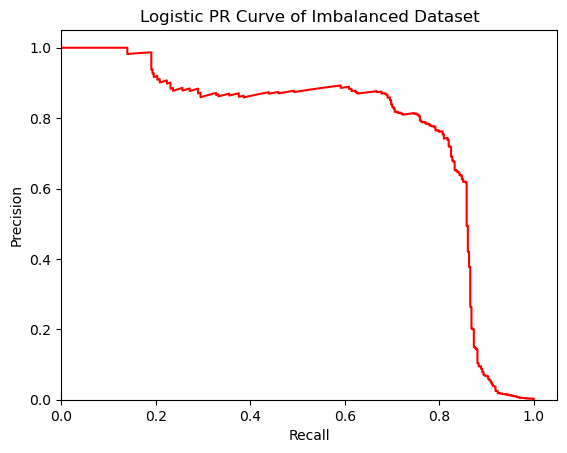

In [21]:
from sklearn.metrics import precision_recall_curve, average_precision_score

PPPrs = average_precision_score(YYY_train, YYY_train_predicted)

precision, recall, threshold = precision_recall_curve(YYY_train, YYY_train_predicted)
print(PPPrs)
plt.plot(recall, precision, color = 'r')

plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic PR Curve of Imbalanced Dataset')
plt.show()

# Undersample
To deal with the highly imbalanced dataset, we choose to undersample the dataset. The reason we choose undersample rather than oversample is to prevent from multicollinearity when performing cross-validation. Remember that cross-validation involves splitting dataset into subsets. Oversample may cause some overlaps among $k$ subsets.

The undersample method we choose is simple. There are total 492 fraud instances in the dataset, therefore we randomly choose 492 nonfraud instances from the dataset. The undersample contains 984 total instances, with 50% fraud and 50% nonfraud. This dataset in now balanced.

In [22]:
df_fraud = Scaled_df.loc[df['Class'] == 1]
df_nofraud = Scaled_df.loc[df['Class'] == 0]
fraud_number = (df['Class'] == 1).sum()
print(fraud_number)
df_nofraud_shuffle = df_nofraud.sample(frac=1, random_state = 77)[:fraud_number]
df_balanced = pd.concat([df_fraud, df_nofraud_shuffle], axis = 0).sample(frac = 1)
print(df_balanced.head())
print((df_balanced['Class'] == 1).sum()/len(df_balanced))

492
        Scaled_Time  Scaled_V1  Scaled_V2  Scaled_V3  Scaled_V4  Scaled_V5  \
142150    -0.001187   0.541089  -0.409036   0.272672  -0.518823  -0.704825   
120989    -0.101681  -1.899502   2.500604   0.516177   0.895450  -0.504864   
102445    -0.193670  -5.908180   9.071328  -5.260067   2.098130  -3.641545   
173774     0.434004  -0.150102   0.718997  -0.204121  -0.460603   0.316790   
8617      -0.858293   0.402961   2.948174  -4.023578   4.677685   0.899524   

        Scaled_V6  Scaled_V7  Scaled_V8  Scaled_V9  ...  Scaled_V21  \
142150   0.078637  -0.705410   0.346401   1.698029  ...    0.011995   
120989   1.706067  -1.752828 -11.923476   0.754223  ...   15.637647   
102445   5.171351 -16.710354 -69.734145  -0.274231  ...   65.656022   
173774  -0.288977   0.490812   0.642625  -0.369488  ...   -0.372694   
8617    -2.238944  -1.228212   0.637296  -1.734988  ...    0.833093   

        Scaled_V22  Scaled_V23  Scaled_V24  Scaled_V25  Scaled_V26  \
142150    0.131578   -0.072986

## Undersample Correlation Matrix
We now check the correlation matrix in this undersample. The correlations are not closed to 0 anymore. Comparing the heatmap of correlation matrix of this undersample to that of the original dataset, we see that the uncorrelation issue occurs previously indded comes from the imbalance. 

In [23]:
balanced_corr_matrix = df_balanced.corr()
print(balanced_corr_matrix)

               Scaled_Time  Scaled_V1  Scaled_V2  Scaled_V3  Scaled_V4  \
Scaled_Time       1.000000   0.243404  -0.214366   0.153430  -0.207140   
Scaled_V1         0.243404   1.000000  -0.825828   0.886105  -0.611059   
Scaled_V2        -0.214366  -0.825828   1.000000  -0.867294   0.683218   
Scaled_V3         0.153430   0.886105  -0.867294   1.000000  -0.763958   
Scaled_V4        -0.207140  -0.611059   0.683218  -0.763958   1.000000   
Scaled_V5         0.287176   0.869078  -0.803586   0.855917  -0.586058   
Scaled_V6         0.147704   0.336132  -0.287175   0.473017  -0.436453   
Scaled_V7         0.221448   0.890403  -0.853502   0.890316  -0.710924   
Scaled_V8        -0.143445  -0.096947  -0.009253  -0.184913   0.107688   
Scaled_V9         0.145434   0.662117  -0.696791   0.767511  -0.802081   
Scaled_V10        0.228551   0.741361  -0.768024   0.852768  -0.787637   
Scaled_V11       -0.321904  -0.523532   0.611992  -0.709172   0.787555   
Scaled_V12        0.276963   0.590568 

<Axes: >

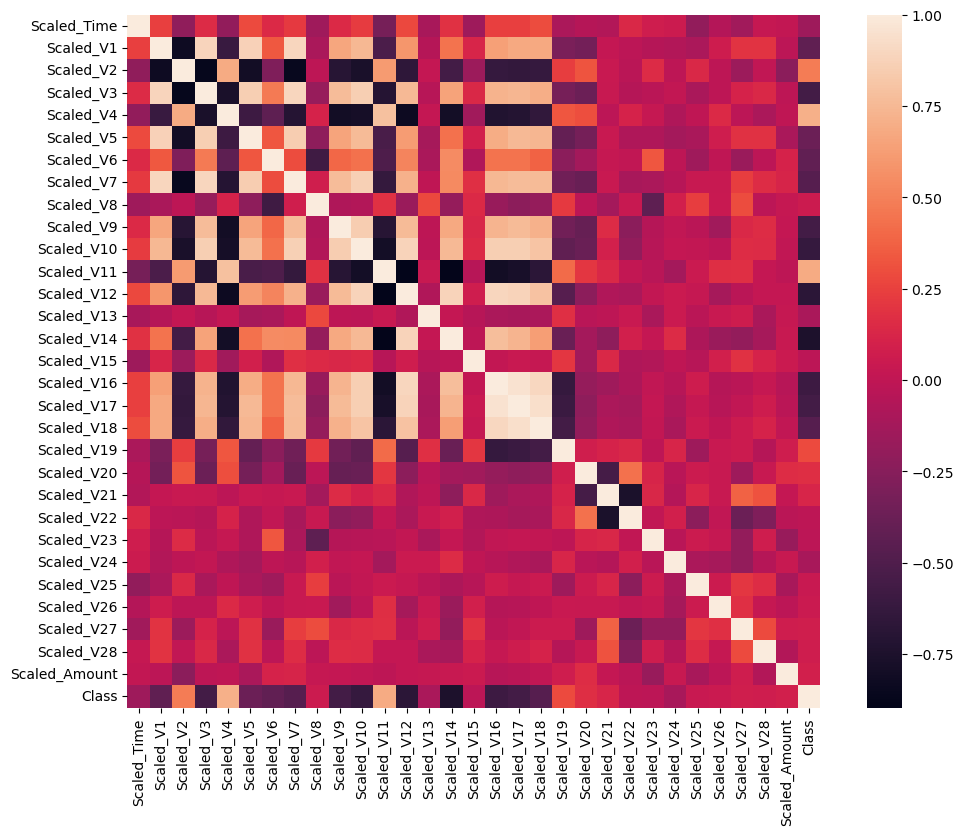

In [24]:
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(balanced_corr_matrix, square = True)

According to the correlation matrix of the balanced undersample, we can find 4 most positively correlated variables and 4 most negatively correlated variables to the dependent variable **Class**. They are listed below.
- Posivitely correlated variables: **V4**, **V11**, **V2**, and **V19**
- Negatively correlated variables: **V14**, **V12**, **V10**, and **V16**

In [25]:
corr_to_class = balanced_corr_matrix['Class'].tolist()
indices = balanced_corr_matrix.columns.tolist()
print(corr_to_class)
positive_corr_indices = np.argsort(corr_to_class)[-5:-1]
negative_corr_indices = np.argsort(corr_to_class)[0:4]

positive_corr_to_class = []
negative_corr_to_class = []

for i in range(4):
    positive_corr_to_class.append([indices[positive_corr_indices[3-i]], corr_to_class[positive_corr_indices[3-i]]])
    negative_corr_to_class.append([indices[negative_corr_indices[i]], corr_to_class[negative_corr_indices[i]]])

print(positive_corr_to_class)
print(negative_corr_to_class)

[-0.14917610495278785, -0.4225978693367856, 0.4774081712266339, -0.5586283349715662, 0.70539566964946, -0.3731918652269983, -0.41767966611393986, -0.46801862534781524, 0.05838988337007031, -0.5594736538742439, -0.6230343482084285, 0.6858674092956012, -0.6811458437692437, -0.09724785725065131, -0.7492821546450386, -0.021592649911246337, -0.5894735281429055, -0.5576832843874722, -0.4686242557637732, 0.28684107560333627, 0.16965337660206636, 0.12234220086330354, -0.007980122377671033, -0.02077748858483992, -0.10503068922657838, 0.036912691871174144, 0.0472578652206217, 0.07611282840828569, 0.0722689775392382, 0.08836676372587256, 1.0]
[['Scaled_V4', 0.70539566964946], ['Scaled_V11', 0.6858674092956012], ['Scaled_V2', 0.4774081712266339], ['Scaled_V19', 0.28684107560333627]]
[['Scaled_V14', -0.7492821546450386], ['Scaled_V12', -0.6811458437692437], ['Scaled_V10', -0.6230343482084285], ['Scaled_V16', -0.5894735281429055]]


We also see there might be multicollinearity issue, because the correlation among **V16**, **V17**, and **V18** are close to 1. We may just drop two of these variables to avoid this issue, but that will also cause information loss. Therefore, we will keep them for now, but pay much attention to the predicted coefficients of these variables as they may be inefficient.

In [26]:
balanced_corr_matrix = balanced_corr_matrix.replace(1,0)
length = len(balanced_corr_matrix.columns)
level = 0.9
multicollinearity = []
for i in range(length):
    for j in range(i):
        if abs(balanced_corr_matrix.iloc[i, j]) > level:
            multicollinearity.append([indices[i], indices[j], balanced_corr_matrix.iloc[i, j]])

print(multicollinearity)

[['Scaled_V17', 'Scaled_V16', 0.951316643142819], ['Scaled_V18', 'Scaled_V16', 0.9032339795196954], ['Scaled_V18', 'Scaled_V17', 0.9376940693807168]]


## Removing Outliers
Outliers are datapoints that deviate significantly from the majority of the data. They can be problematic. The outliers may lead to inefficient estimated parameters that are heavily influenced by extreme datapoints. Such inefficient parameters will make the model less robust and cannot generalize to new data. The outliers will also cause heteroskedasticity (although logistic regression does not assume homoskedasticity) and cause overfitting in the model. 

We therefore want to remove the outliers of those variables that are highly correlated to our dependent variable **Class**. The reason we don't remove the outliers of all variables is that we have a undersample including only 984 instances. Romoving all the outliers will cause us to lose too much information or degrees of freedom. 

We could roughly have the idea of the outliers by plotting the boxplots of the highly correlated variables to **Class**. The boxplots are plotted seperately for fraud instances and nonfraud instances. In a boxplot, the central rectangular box in the middle is the interquartile range (IQR) of the data. The upper bound and the lower bound of this rectangle are the first quartile (Q1) and the third quartile (Q3) of the data. The middle line is the second quartile (Q2), also known as the median of the data. The whiskers extend from the middel rectangular box to a minimum and a maximum value. Usually, the maximum value is calculated as Q3 + 1.5IQR and the minimum value is calculated as Q1 - 1.5IQR. All datapoints beyond these limits are outliers, represented by dots in the plot. By plotting the boxplots, we can visualize the outliers.

[['Scaled_V4', 0.70539566964946], ['Scaled_V11', 0.6858674092956012], ['Scaled_V2', 0.4774081712266339], ['Scaled_V19', 0.28684107560333627]]


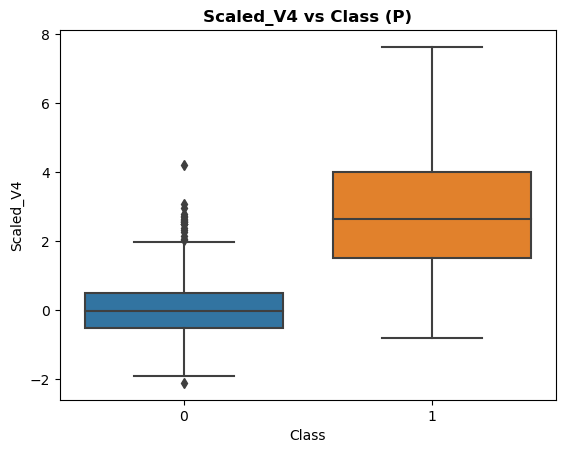

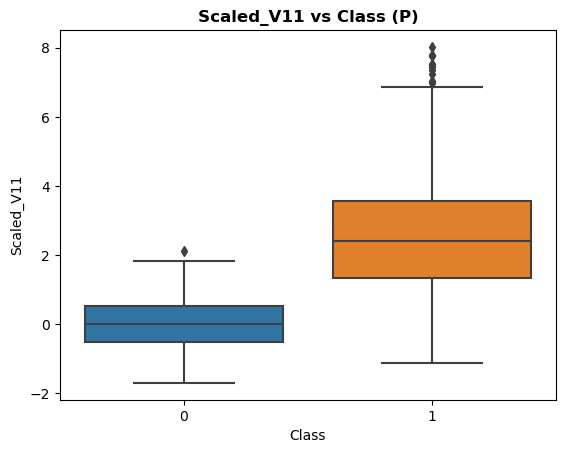

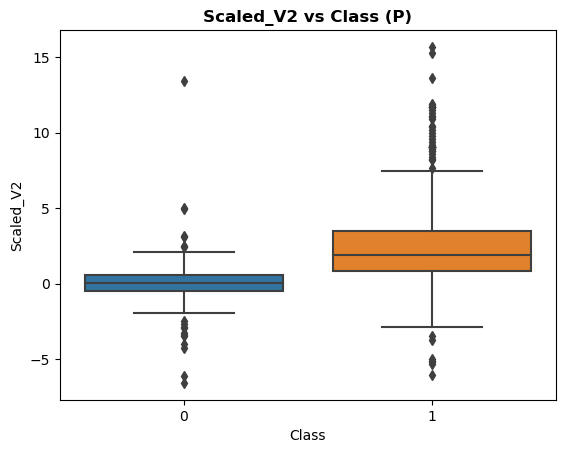

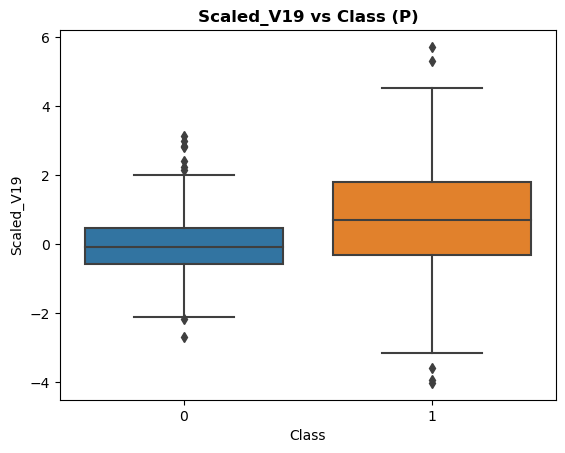

In [27]:
print(positive_corr_to_class)
for i in range(4):
    f, ax = plt.subplots()
    sns.boxplot(x = 'Class', y = positive_corr_to_class[i][0], data = df_balanced, whis = 1.5)
    ax.set_title(positive_corr_to_class[i][0]+ ' vs Class' + ' (P)', fontweight = 'bold')
    plt.show()

[['Scaled_V14', -0.7492821546450386], ['Scaled_V12', -0.6811458437692437], ['Scaled_V10', -0.6230343482084285], ['Scaled_V16', -0.5894735281429055]]


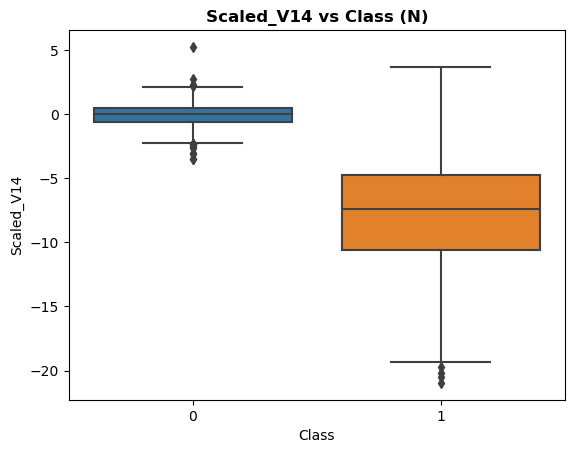

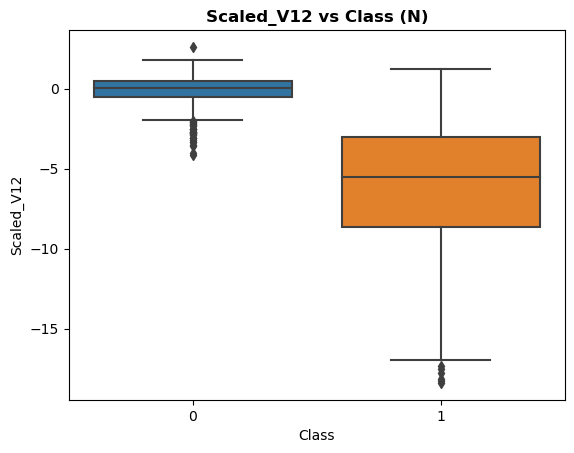

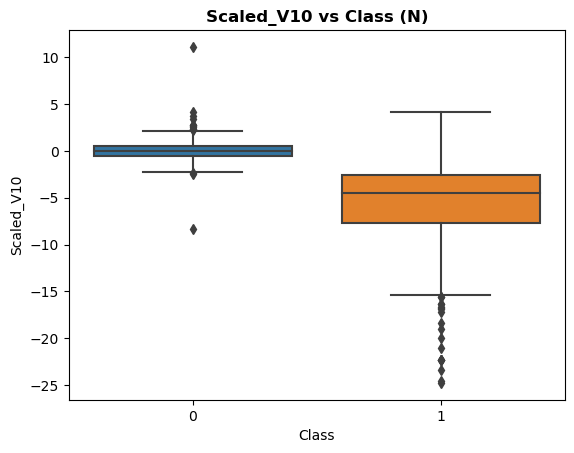

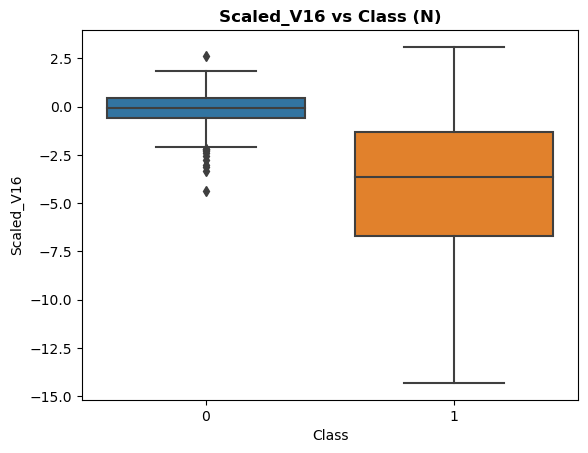

In [28]:
print(negative_corr_to_class)
for i in range(4):
    f, ax = plt.subplots()
    sns.boxplot(x = 'Class', y = negative_corr_to_class[i][0], data = df_balanced)
    ax.set_title(negative_corr_to_class[i][0]+ ' vs Class' + ' (N)', fontweight = 'bold')
    plt.show()

From the correlation matrix, we see that variables **V4**, **V10**, **V11**, **V12**, and **V14** are highly correlated to **Class**. As we have discussed previously, we don't remove outliers of other variables because of information loss.

To get more insight about our undersample, we first split the undersample into fraud susbset and nonfraud subset. After plotting the histograms of the highly related variables for the two subsets respectively, we can see for fraud instances that only variable **V14** is close to a normal distribution. However, for non-fraud intances, all 5 variables are close to normal distributions. This is intuitive because the undersample is created by choosing 492 random nonfraud instances from a highly inbalanced dataset and the non-fraud instances are drawn randomly from a large population. Therefore, we also don't want to remove outliers for the nonfraud instances, because they are randomly chosen and are roughly normally distributed. Removing outliers for such instances give us no efficiency improvement and result in information loss.

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4400/3949815080.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 1].values, fit = norm, ax = axes[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4400/3949815080.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mw

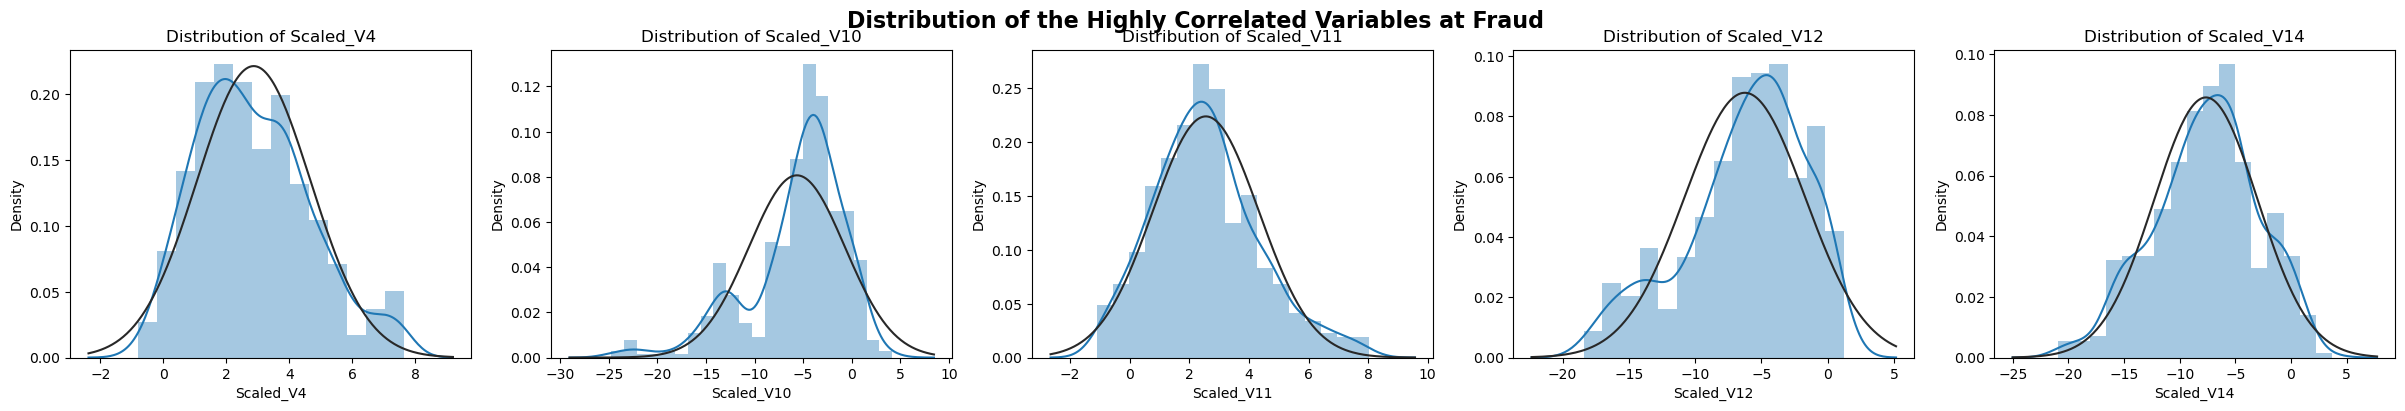

In [29]:
outlier_indices = ['Scaled_V4', 'Scaled_V10', 'Scaled_V11', 'Scaled_V12', 'Scaled_V14']
f, axes = plt.subplots(ncols = 5, figsize=(30, 4))
for i in range(5):
    sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 1].values, fit = norm, ax = axes[i])
    axes[i].set_title('Distribution of ' + outlier_indices[i])
    axes[i].set_xlabel(outlier_indices[i])
f.suptitle('Distribution of the Highly Correlated Variables at Fraud', fontsize=16, fontweight = 'bold')
plt.show()

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4400/1262102498.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 0].values, fit = norm, ax = axes[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4400/1262102498.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mw

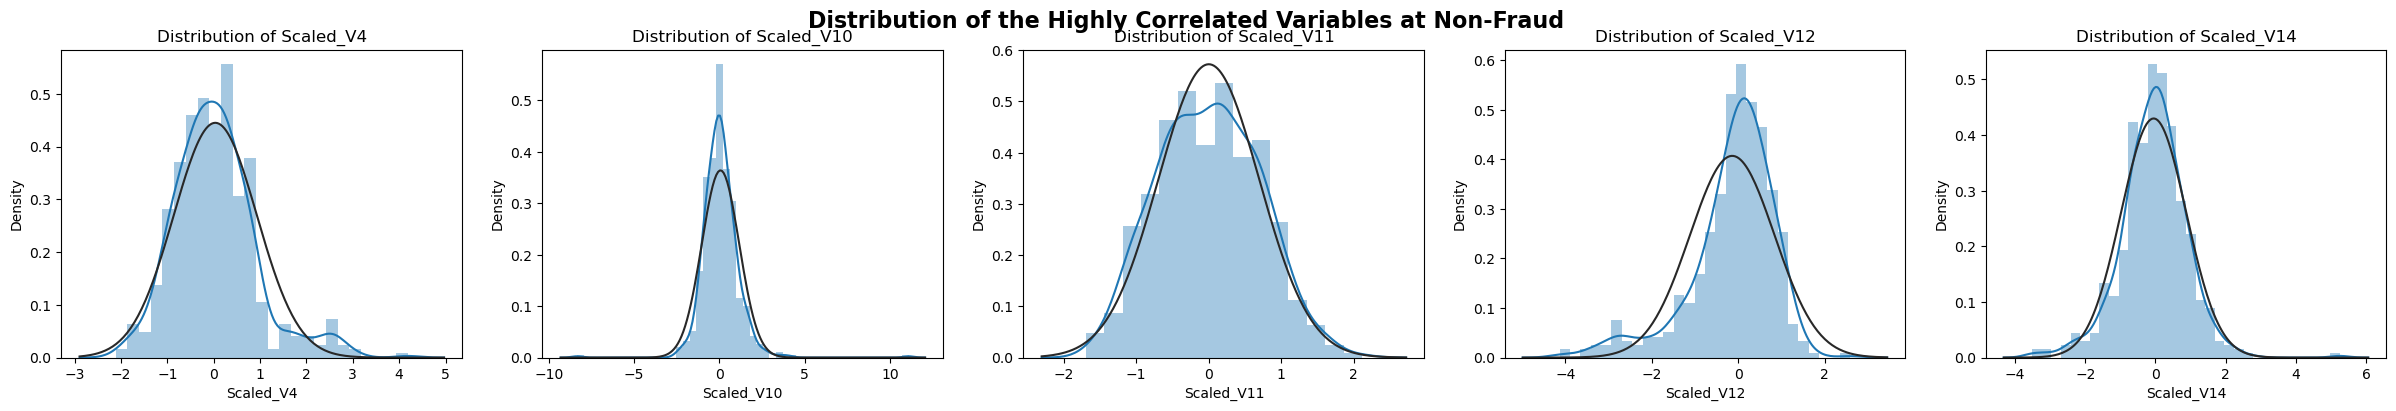

In [30]:
f, axes = plt.subplots(ncols = 5, figsize=(30, 4))
for i in range(5):
    sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 0].values, fit = norm, ax = axes[i])
    axes[i].set_title('Distribution of ' + outlier_indices[i])
    axes[i].set_xlabel(outlier_indices[i])
f.suptitle('Distribution of the Highly Correlated Variables at Non-Fraud', fontsize=16, fontweight = 'bold')
plt.show()

We now remove the extreme outliers. Similar to how the boxplots is plotted, this procedure involves putting an upper threshold and a lower threshold on the variables. Any values exceeding the thresholds will be automatically deleted. The upper threshold is set by Q3 + $T \cdot$ IQR, while the lower threshold is set by Q1 - $T \cdot$ IQR. We can set higher $T$ to exclude only the most extreme outliers by losing the accuracy, or we can set lower T to exclude most outliers by losing the information or degrees of freedom. At default, we set $T = 1.5$.

In [31]:
fraud_data_list = []
for i in outlier_indices:
    fraud_data_list.append(df_balanced[i].loc[df_balanced['Class'] == 1].values)

percentile_25 = np.percentile(fraud_data_list, 25, axis = 1)
percentile_75 = np.percentile(fraud_data_list, 75, axis = 1)
percentile_difference = []
for i in range(5):
    percentile_difference.append(percentile_75[i] - percentile_25[i])

T = 1.5
Threshold = [T * percentile_difference[i] for i in range(5)]

Lower_threshold = [percentile_25[i] - Threshold[i] for i in range(5)]
Upper_threshold = [percentile_75[i] + Threshold[i] for i in range(5)]

print('Upper Thresholds are', Upper_threshold)
print('Lower Thresholds are', Lower_threshold)

Upper Thresholds are [7.746381853814469, 5.248404801131782, 6.883990217558612, 5.3301049003379655, 4.115960368706195]
Lower Thresholds are [-2.2428803583808445, -15.543099198090895, -1.993470546243325, -16.994706087676164, -19.43802507206913]


The following plots graphically shows where we put the thresholds, which are indicated by the green verticle lines. Comparing to the boxplots of these variables, we can see that the extreme outliers of V10, V12, and V14 passes throught the lower threshold and the extreme outliers of V11 passes the upper threshold. The boxplots are consistent with the previous threshold plots in all the variables.

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4400/3692812454.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud_data_list[i], ax = axes[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4400/3692812454.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud_da

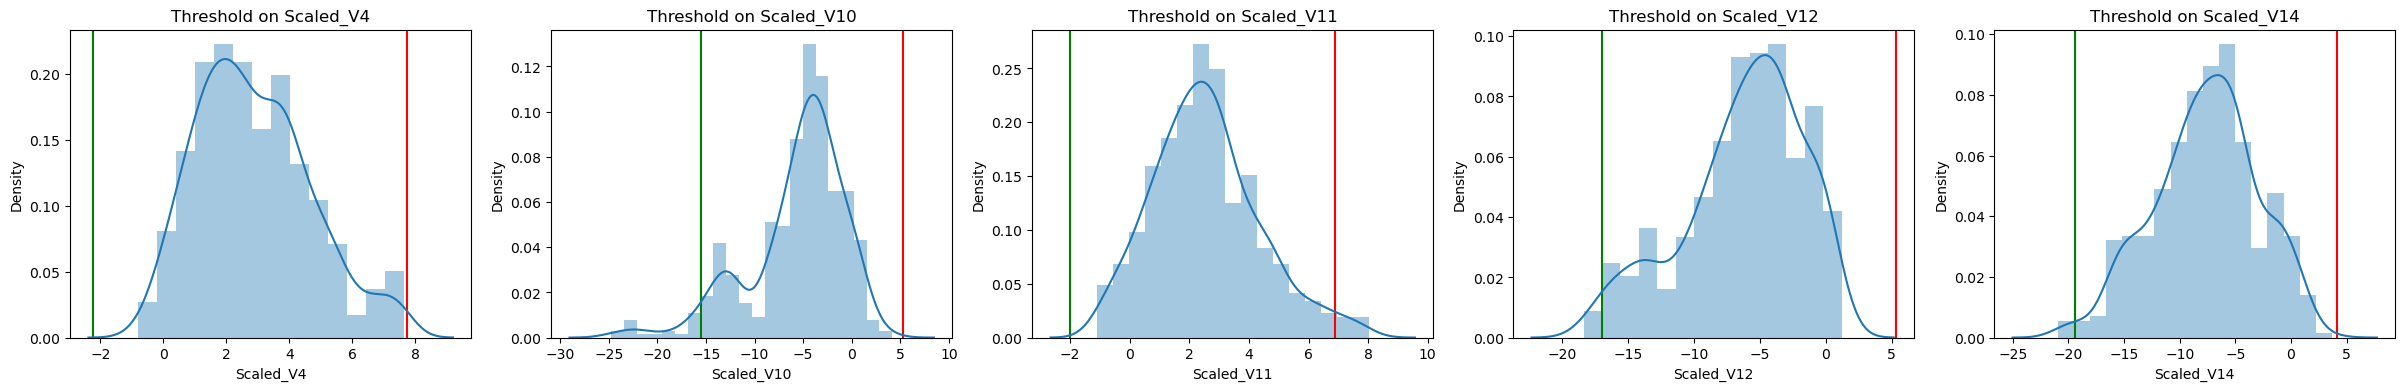

In [32]:
f, axes = plt.subplots(ncols = 5, figsize = (30,4))

for i in range(5):
    axes[i].axvline(x = Lower_threshold[i], color = 'green')
    axes[i].axvline(x = Upper_threshold[i], color = 'red')
    sns.distplot(fraud_data_list[i], ax = axes[i])
    axes[i].set_xlabel(outlier_indices[i])
    axes[i].set_title('Threshold on ' + outlier_indices[i])

plt.show()

We can count the numbers of outliers in each of the variables. 

In [33]:
outlier_elements = [[outlier_indices[i]] for i in range(5)]
eliminate_indices_d = []
for i in range(5):
    for indices, values in enumerate(df_balanced[outlier_indices[i]]):
        if values < Lower_threshold[i] or values > Upper_threshold[i]:
            outlier_elements[i].append(values)
            eliminate_indices_d.append(indices)
    print(outlier_elements[i], 'count is', len(outlier_elements[i])-1)
eliminate_indices = list(set(eliminate_indices_d))
print(eliminate_indices)

['Scaled_V4'] count is 0
['Scaled_V10', -22.332025751777895, -21.080802176590016, -23.384400690377735, -19.955777024117175, -16.38513554184591, -18.373948562862854, -15.637425490133717, -17.232132745970617, -24.571979522916788, 11.09173657455413, -22.332025751777895, -15.637425490133717, -19.02293597741207, -22.332025751777895, -16.73495187610898, -16.83240578684039, -16.336693686081375, -22.332025751777895, -16.68599929746956, -24.75904943976854] count is 20
['Scaled_V11', 7.042212644007624, 7.757524133673799, 7.247093300121521, 6.976693069856236, 7.49705117918821, 7.362963669658261, 7.446468456283821, 7.529972327154136, 7.790465794557108, 8.02328074166663] count is 10
['Scaled_V12', -17.358345066149475, -18.38598575572975, -18.139276186411564, -17.764661133230458, -18.25899179702598, -17.492683677993842] count is 6
['Scaled_V14', 5.249459474799662, -20.542285717191973, -19.70189277135501, -20.18492764587946, -20.969224391850393] count is 5
[138, 268, 14, 656, 767, 149, 794, 669, 159,

The following is the dataset in which the outliers have been reduced. Since we only deleted the outliers for fraud instances. There are still outliers from the nonfraud cases. However, when we plot the boxplots for this new dataset, we can clearly see that the number of the outliers has been reduced.

In [34]:
df_balanced_reset = df_balanced.reset_index(drop = False)
new_df_reset = df_balanced_reset.drop([df_balanced_reset.index[i] for i in eliminate_indices])
new_df = new_df_reset.set_index('index')
print(new_df.head())

        Scaled_Time  Scaled_V1  Scaled_V2  Scaled_V3  Scaled_V4  Scaled_V5  \
index                                                                        
142150    -0.001187   0.541089  -0.409036   0.272672  -0.518823  -0.704825   
120989    -0.101681  -1.899502   2.500604   0.516177   0.895450  -0.504864   
102445    -0.193670  -5.908180   9.071328  -5.260067   2.098130  -3.641545   
173774     0.434004  -0.150102   0.718997  -0.204121  -0.460603   0.316790   
8617      -0.858293   0.402961   2.948174  -4.023578   4.677685   0.899524   

        Scaled_V6  Scaled_V7  Scaled_V8  Scaled_V9  ...  Scaled_V21  \
index                                               ...               
142150   0.078637  -0.705410   0.346401   1.698029  ...    0.011995   
120989   1.706067  -1.752828 -11.923476   0.754223  ...   15.637647   
102445   5.171351 -16.710354 -69.734145  -0.274231  ...   65.656022   
173774  -0.288977   0.490812   0.642625  -0.369488  ...   -0.372694   
8617    -2.238944  -1.22821

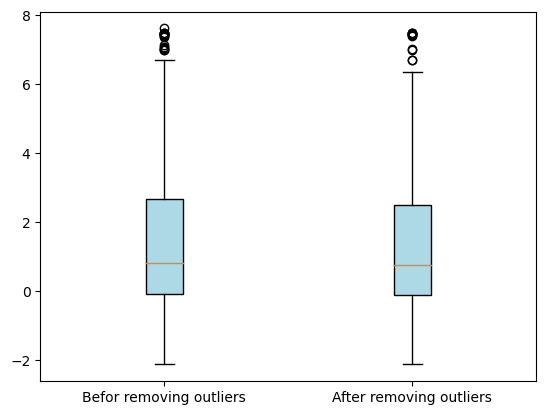

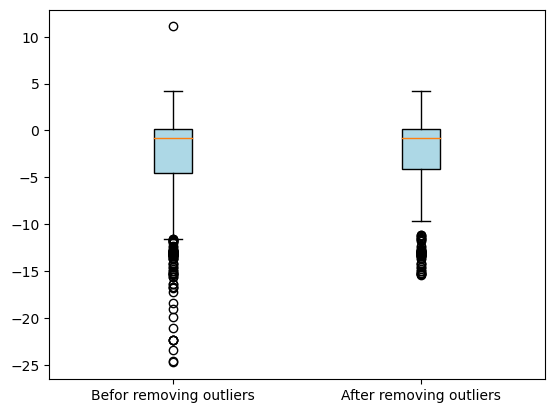

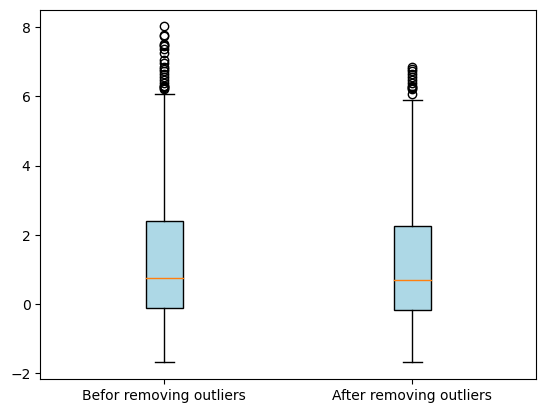

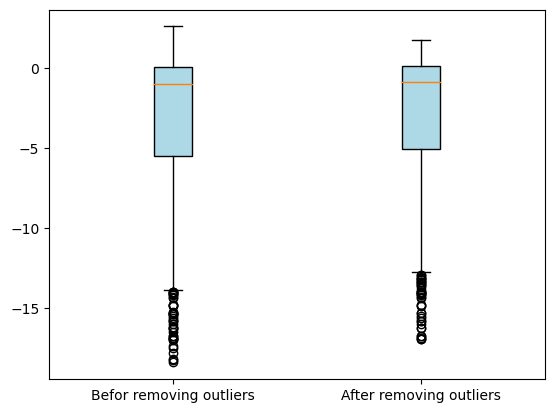

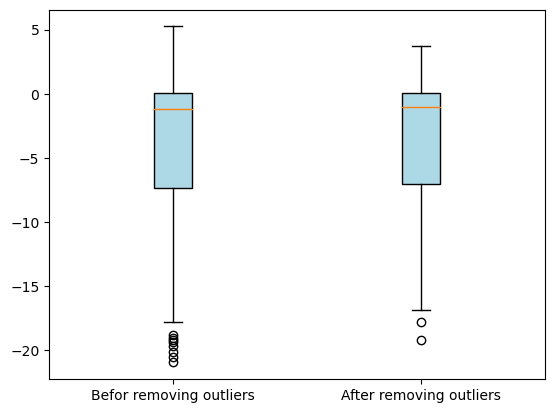

In [35]:
#f, axes = plt.subplots(ncols = 5, figsize = [30, 4])

for i in range(5):
    my_dict = {'Befor removing outliers': df_balanced[outlier_indices[i]], 'After removing outliers': new_df[outlier_indices[i]]}
    f, ax = plt.subplots()
    ax.boxplot(my_dict.values(), patch_artist = True, boxprops = dict(facecolor = "lightblue"))
    ax.set_xticklabels(my_dict.keys())
plt.show()

# Logistic Regression on Undersample
We have prepared our data sufficiently and are now in a position of doing logistic regression. Similar to what we have done previously, we first split the dataset into training subset and test subset. We then train the training subset and evaluate the performance of our model using various tools discussed previously.

In [36]:
X = new_df.drop('Class', axis = 1)
y = new_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [37]:
model_logistic = LogisticRegression(solver = 'liblinear', penalty = 'l1', random_state = 7)

model_logistic.fit(X_train, y_train)

print(model_logistic.intercept_)
print(model_logistic.coef_)

[-3.42129203]
[[-0.08634341  0.28894243 -0.45478536 -0.14578826  1.42250633  0.12887909
  -0.18964965  0.01483115 -0.31258188 -0.20154521 -0.699654    0.81749717
  -0.75606271 -0.38637498 -0.90728999 -0.1590079  -0.12690828 -0.14796794
  -0.24767096  0.07597396 -0.08231622 -0.03140733  0.36872157 -0.09683614
   0.          0.         -0.31173008 -0.04631497  0.03635666  0.03724598]]


In [38]:
cvs = cross_val_score(model_logistic, X_train, y_train, cv = 10)

roc_cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 77)
y_train_predicted = cross_val_predict(model_logistic, X_train, y_train, cv = roc_cv, method = 'predict_proba')[:, 1]
ras = roc_auc_score(y_train, y_train_predicted)

print('The cvs score of the model is', cvs.mean())
#print('The ras score of the model is', ras)
print('By predicting the test data, we have an accuracy of', model_logistic.score(X_test, y_test))
print(classification_report(y_test, model_logistic.predict(X_test)))

The cvs score of the model is 0.9393859649122808
By predicting the test data, we have an accuracy of 0.9315789473684211
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       100
           1       0.98      0.88      0.92        90

    accuracy                           0.93       190
   macro avg       0.94      0.93      0.93       190
weighted avg       0.94      0.93      0.93       190



The training and cross-validation score are all higher than 0.93. These are good results, showing our estimator is sufficiently efficient and robust. As the undersample is balanced, the results are valid. 

## Grid Search
For a machine learning algorithm (such as logistic regression), hyperparameters are parameters that are not learned by the dataset but are set prior to training. Grid search is a technique to find the most efficient combination of those hyperparameters for the model. 

For a logistic regression, there are 3 commonly recognised hyperparameters:
- Penalty: Penalty term controls the regularisation method used. There are two regularisation methods, L1 and L2. L1 regularisation drives the coefficient of less important features to 0 and, therefore, encourages sparsity in the model. L2 regularisation controls the maginitudes of large coefficients and, therefore, encourages diversity in the model.
- C: C term controls the strength of the regularisation, where smaller C indicates stronger regularisation and vise vesa. 
- Solver: solver term controls the optimisation algorithm used to estimate the model.

In performing the grid search, we create a grid that contains every possible combination of the hyperparameters. For each combination in the grid, we train a logistic regression model and evaluate its performance. The hyperparameter combination that yields the best performance is then selected. We see that by choosing the penalty of L1 regularisation rather than L2 regularisation we used above, we have impoved both training and cross-validation score. We now accept the model with a combination of L1 regularisation and C = 1 as our logistic regression with the best efficiency.

In [39]:
grid_parameter_log = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.01, 0.1, 1, 10, 100],
    #'solver' : ['lbfgs', 'liblinear', 'saga']
}

gs = GridSearchCV(estimator = model_logistic, param_grid = grid_parameter_log, cv = 10, scoring = 'accuracy')

gs.fit(X_train, y_train)

bestparameters_logistic = gs.best_params_
bestmodel_logistic = gs.best_estimator_
cvs_score_log = cross_val_score(bestmodel_logistic, X_train, y_train, cv = 10)
best_training_score_log = bestmodel_logistic.score(X_test, y_test)

print(bestparameters_logistic)
print('cvs score under this logistic regression is', cvs_score_log.mean())
print('The best training score is', best_training_score_log)

{'C': 0.1, 'penalty': 'l1'}
cvs score under this logistic regression is 0.9420175438596491
The best training score is 0.9263157894736842


## Learning Curve
Learning curve illustrates the change in model's training score and cross-validation score when we gradually increase the size of training data. The curve can tell us about the sensitivity of our model to the size of the data and can provide evidence of underfitting and overfitting. 

We start by setting a small dataset size (for example 10%), which is used for training. The performance of the model trained with this small dataset is evaluated on a seperate validation dataset in a cross-validation manner. The training and cross-validation scores are recorded and we can calculate the mean ($\mu$) and standard deviation ($s$) of the scores. We then choose a larger size (for example 20%) and iterate the process. The recorded means and standard deviations of training and cross-validation scores are plotted on the graph, where the x-axis represents the size of training dataset. The shaded area represents the range of $[\mu - sd, \mu + sd]$. This graph is the learning curve.

As we can see in the learning curve of logistic regression model, the cross-validation score is low when the the dataset size is small. This is exactly the case of underfitting, where the model cannot generalise to the new data. We also see that both scores converges to constant as we increase the size of training dataset. It is a valid proof that we can use undersample method without losing too much information of the original dataset. If we increase the size of the training dataset further, we may encounter the problem of overfitting, where the training score increases while the cross-validation scores decreases. This situation occurs when the model explain the training dataset too well by overfitting the parameters but lose the ability to generalise to the new data.

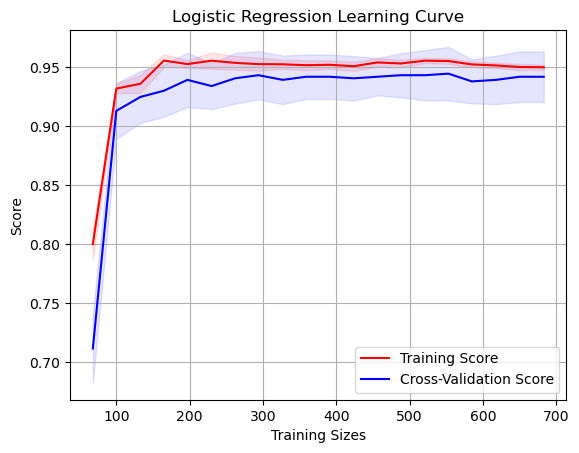

In [40]:
training_sizes = np.linspace(0.1, 1.0, 20)

training_sizes, training_score, test_score = learning_curve(
    bestmodel_logistic, X_train, y_train, cv = 10, train_sizes = training_sizes, scoring = 'accuracy'
)

training_score_mean = np.mean(training_score, axis = 1)
training_score_std = np.std(training_score, axis = 1)
test_score_mean = np.mean(test_score, axis = 1)
test_score_std = np.std(test_score, axis = 1)

plt.figure()

plt.title('Logistic Regression Learning Curve')
plt.xlabel('Training Sizes')
plt.ylabel('Score')
plt.grid()

plt.plot(training_sizes, training_score_mean, color = 'r', label = 'Training Score')
plt.plot(training_sizes, test_score_mean, color = 'b', label = 'Cross-Validation Score')

plt.fill_between(
    training_sizes, training_score_mean - training_score_std, training_score_mean + training_score_std, alpha = 0.1, color = 'r'
)
plt.fill_between(
    training_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, alpha = 0.1, color = 'b'
)


plt.legend()
plt.show()



## ROC and PR Curves
We now look into the positives and negatives of our model. As discussed previously, these curves are commonly used tools in measuring performance of a binary classification model. 

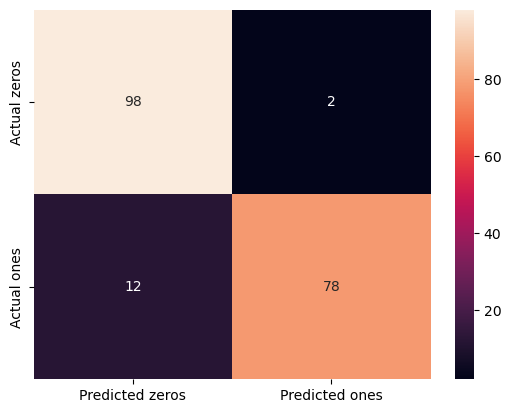

In [41]:
df_confusion_matrix = confusion_matrix(y_test, bestmodel_logistic.predict(X_test))

xlabels = ['Predicted zeros', 'Predicted ones']
ylabels = ['Actual zeros', 'Actual ones']
ax = sns.heatmap(df_confusion_matrix, annot = True, xticklabels = xlabels, yticklabels = ylabels)

plt.show()

We will plot a ROC curve

0.9751858800639289


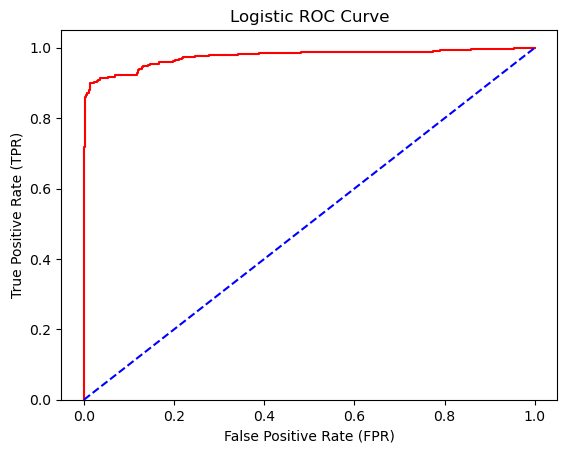

In [42]:
from sklearn.metrics import roc_curve

bestmodel_y_train_predicted = cross_val_predict(bestmodel_logistic, X_train, y_train, cv = roc_cv, method = 'predict_proba')[:, 1]
bestmodel_ras = roc_auc_score(y_train, bestmodel_y_train_predicted)
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_train, bestmodel_y_train_predicted)
print(bestmodel_ras)
plt.figure()
plt.plot(fpr_logistic, tpr_logistic, color = 'r')
plt.plot([0, 1], [0, 1], color = 'b', linestyle = '--')
plt.xlim(-0.05, 1.05)
plt.ylim(0, 1.05)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Logistic ROC Curve')

plt.show()

0.9808704328776838


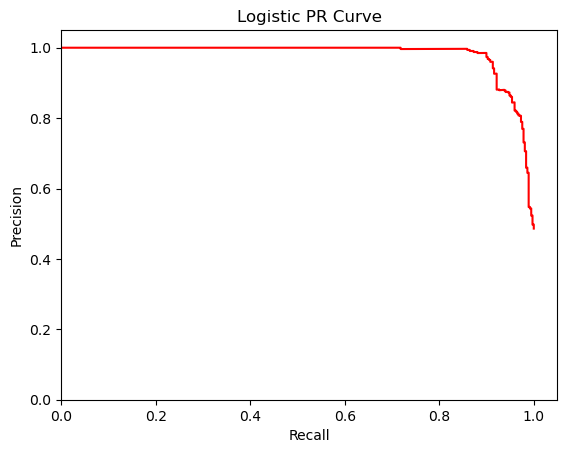

In [43]:
from sklearn.metrics import precision_recall_curve, average_precision_score

prs = average_precision_score(y_train, bestmodel_y_train_predicted)

precision, recall, _ = precision_recall_curve(y_train, bestmodel_y_train_predicted)
print(prs)
plt.plot(recall, precision, color = 'r')

plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic PR Curve')
plt.show()

The ROC AUC and PR scores are 0.979 and 0.938 respectively. Comparing to the PR score of 0.776 for the original dataset. It is a significant improvement and shows a valid proof for the rationality of implementing undersmaple algorithm.

# Decision Tree Classifier
Decision tree classifier (DTC) is a machine learning algorithm that is used in both classification and regression tasks. Unlike logistic regression where we have a function of parameters and variables, DTC does not have parameters. It has a tree-like structure that contains multiple nodes. Each node represents a decision on the features from the dataset. To understand how a DTC makes decision, it is crucial to understand the concept of purity. Intuitively, purity is a quantitative measure of how 'similar' datapoints are in a group or a node. There are commonly two ways of measuring purity. They are:
- Gini Impurity: Gini Impurity has formula of 
$$Gini = 1 - \sum_{i} P^2_i$$
where $P_i$ is the proportion of the datapoints that are in category $i$. A $Gini$ of zero implies purity where all the datapoints fall into one category. Consider the situation that we have two categories $i$ and $j$ and we have two datapoints. If both datapoints are in one category, say $i$, $P_i = 1$ and $P_j = 0$. We therefore obtain a $Gini$ of 0. However, if one datapoint is in one category and another datapoint in the other category, we have $P_i = P_j = 0.5$. We therefore obtain a $Gini$ of value 0.5.
- Entropy: Entropy, as its name indicates, measures the disorder in a group of datapoints. The formula for entropy is
$$Entropy = - \sum_{i} P_i log_{2} P_i$$
where $P_i$ is defined as previous. One may worry that if $P_i = 0$, the $log_2 P_i$ is not defined. But one can simply prove that by using L'Hopital's rule that $\lim_{P_i \to 0} P_i log_2 P_i = 0$. A lower Entropy indicates high purity and vise vesa. By considering the imagined case discussed in Gini situation, one can illustrate the point easily.

The goal of DTC is to maximise the purity (or minimise the Gini or Entropy calculated) of the subsets in each node. It starts by finding the most 'important' feature that can best seperate the whole dataset into two subsets based on the purity. This feature is used to create the root node. For the subsets, this process of finding feature and maximising purity is iterated until it reaches the leaf nodes, which are at the bottom of the tree and represent the category labels. 

Although DTC is a great tool to visualise the logicc behind the decision, it may have problem of overfitting once the tree grows too large and too complex. To avoid this problem, it is essential to set some limitations to the tree. We will be using three limitations on a DTC.
- Maximum Depth: Maximum depth controls how deep the tree can grow. Since our undersmaple dataset contains less than 1000 datapoints. It will highly likely be the case of overfitting if there are too many layers (say 100) of nodes.
- Minimum Samples per Leaf: Minimum Sample per leaf controls how many datapoints in each leaf nodes. The number of the datapoints in any leaf nodes should not be less than this threshold we set. Imaging there are 1000 leaf nodes and a dataset with only 1000 datapoints with every leaf node contains one datapoint. This classifier can not be generalised to other new data and is in the case of overfitting.
- Minimum Samples per Split: Minimum Samples per Split controls the minimum number of datapoints required in each split. This threshold is set for the same reason as the Minimum Samples per Leaf.

In [44]:
from sklearn.tree import DecisionTreeClassifier

model_DTC = DecisionTreeClassifier(random_state = 77)

model_DTC.fit(X_train, y_train)

y_test_predicted = model_DTC.predict(X_test)
cvs = cross_val_score(model_DTC, X_train, y_train, cv = 10)

print(model_DTC.score(X_test, y_test))
print(classification_report(y_test, y_test_predicted))
print(cvs.mean())

0.9105263157894737
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       100
           1       0.94      0.87      0.90        90

    accuracy                           0.91       190
   macro avg       0.91      0.91      0.91       190
weighted avg       0.91      0.91      0.91       190

0.9050877192982456


## Grid Search
As discussed previously, grid search can provide us with the best combination of hyperparameter for the DTC. We will be using 4 hyperparameters for a DTC as fully explained in the above section.

In [45]:
grid_parameters_DTC = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 10, 20, 30, 40],
    'min_samples_split' : [2, 4, 6, 8, 10],
    'min_samples_leaf' : [1, 2, 4]
}

gs = GridSearchCV(estimator = model_DTC, param_grid = grid_parameters_DTC, cv = 10, n_jobs = -1)

gs.fit(X_train, y_train)

bestparameters_DTC = gs.best_params_

bestmodel_DTC = gs.best_estimator_

best_cvs_DTC = cross_val_score(bestmodel_DTC, X_train, y_train, cv = 10)
best_training_score_DTC = bestmodel_DTC.score(X_test, y_test)
print(bestparameters_DTC)
print(best_training_score_DTC)
print(best_cvs_DTC.mean())

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.9052631578947369
0.9183508771929825


The tree can be visualised by plotting the entire tree.

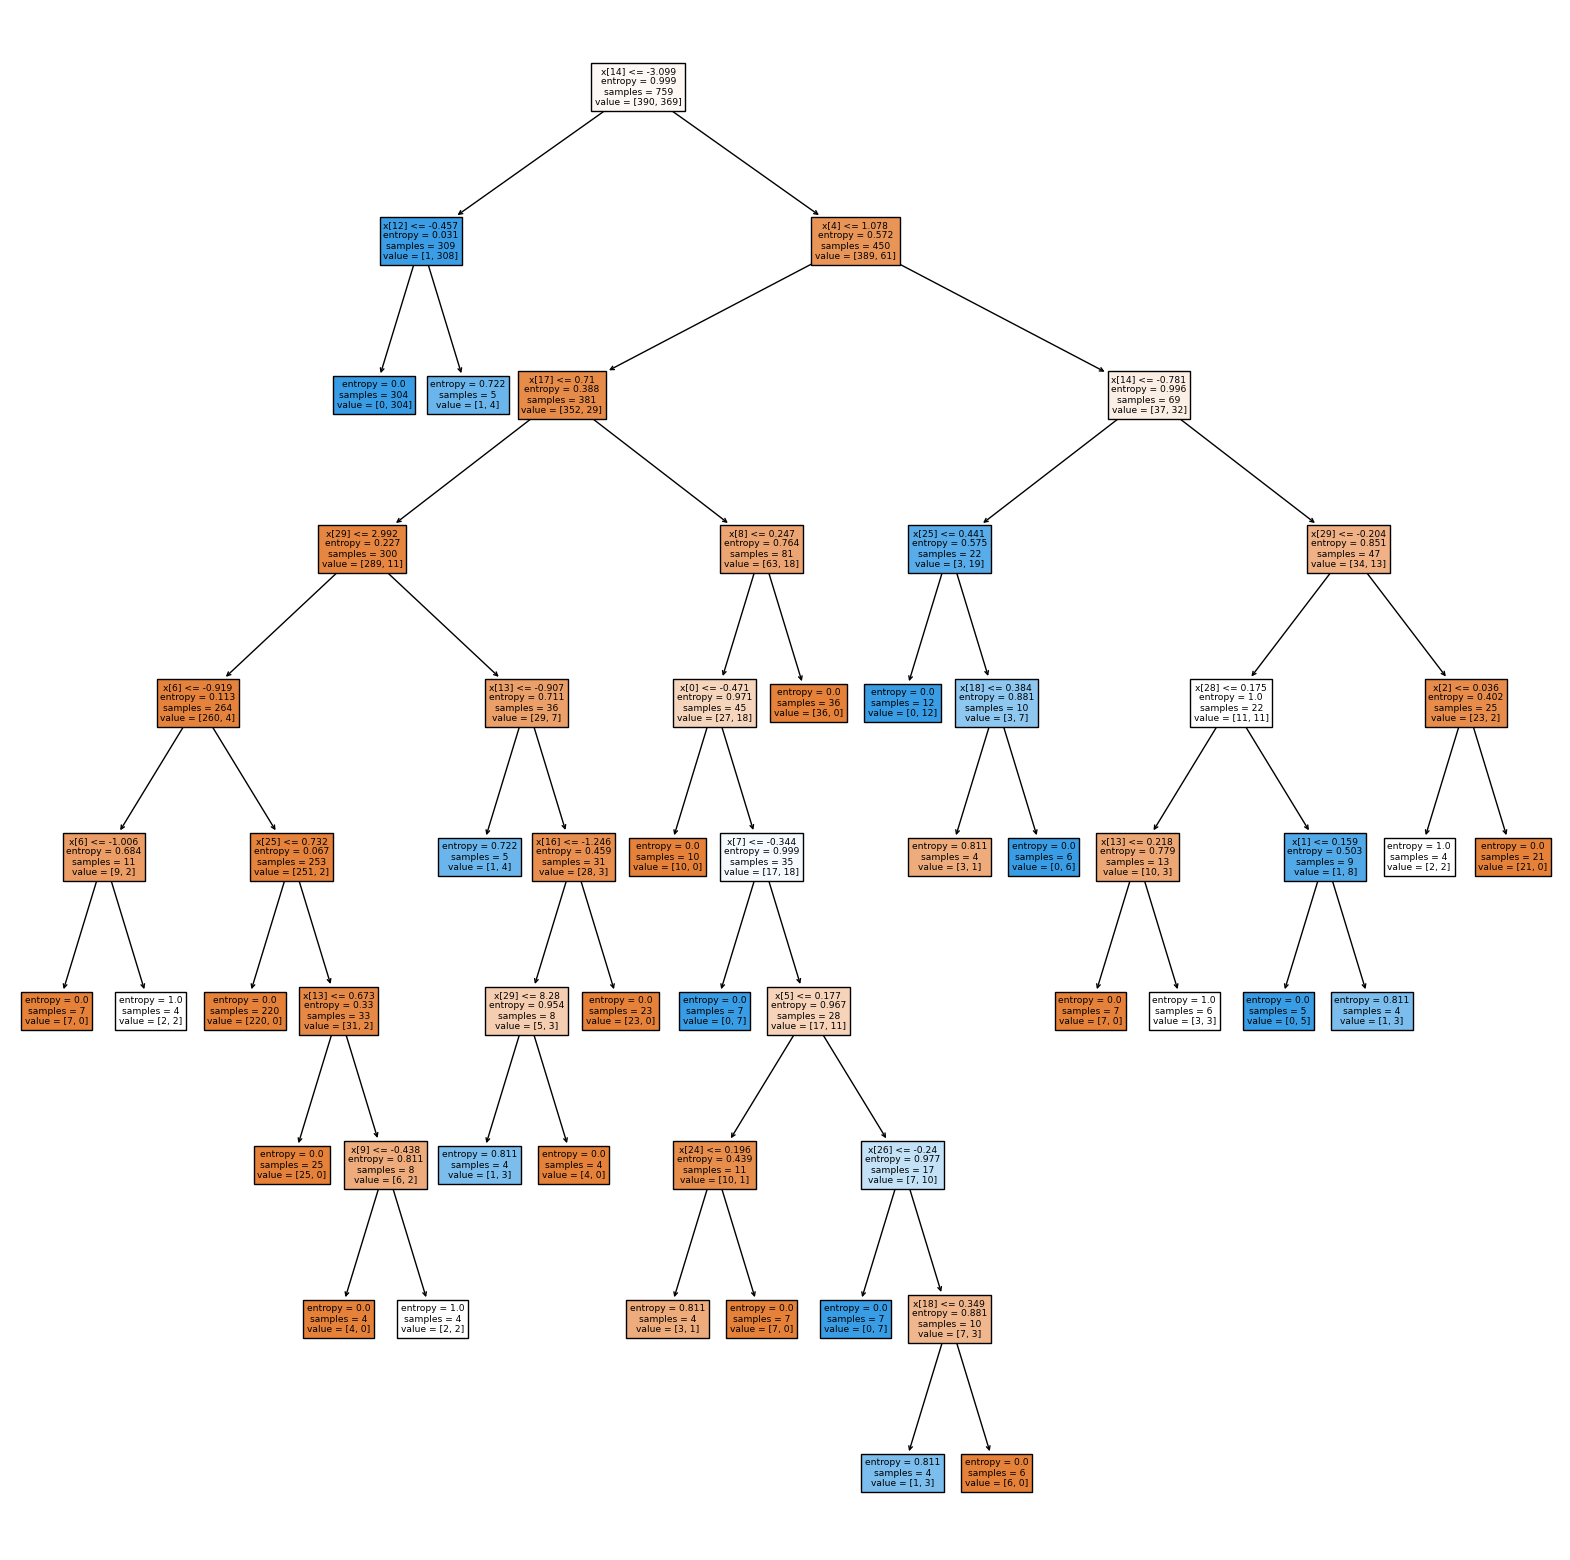

In [46]:
from sklearn import tree

plt.figure(figsize = (20, 20))
tree.plot_tree(bestmodel_DTC, filled = True)

plt.show()

We could also find the important features that the tree considers. We can see that the DTC gives the top three important features are V14, V4, and V8. While in the correlation matrix, we have the most correlated variables to 'Class' are V14, V4, V11, and V12. The Decision Tree Classifier shows some consistency with the rough result we interpreted previously. We could also see that V14 is the root node, which is regarded much more 'important' than other features.

In [47]:
Importance = bestmodel_DTC.feature_importances_
print(Importance)

ranked = sorted([(x, i) for (i, x) in enumerate(Importance)], reverse = True)

Highest_Importances = []

for x, i in ranked:
    Highest_Importances.append([x, i])
    if len(Highest_Importances) ==3:
        break

print('Most important variable is', Highest_Importances[0][1], 'Coefficient is', Highest_Importances[0][0])
print('Second most important variable is', Highest_Importances[1][1], 'Coefficient is', Highest_Importances[1][0])
print('Third most important variable is', Highest_Importances[2][1], 'Coefficient is', Highest_Importances[2][0])  

[0.01215026 0.00179075 0.00844258 0.         0.05705933 0.00782941
 0.01263983 0.01103566 0.02538959 0.00347246 0.         0.
 0.0085091  0.0227038  0.70748549 0.         0.00918067 0.02512675
 0.01552787 0.         0.         0.         0.         0.
 0.00221625 0.0136433  0.01088105 0.         0.01023394 0.03468193]
Most important variable is 14 Coefficient is 0.7074854851084065
Second most important variable is 4 Coefficient is 0.0570593284689633
Third most important variable is 29 Coefficient is 0.03468192614314306


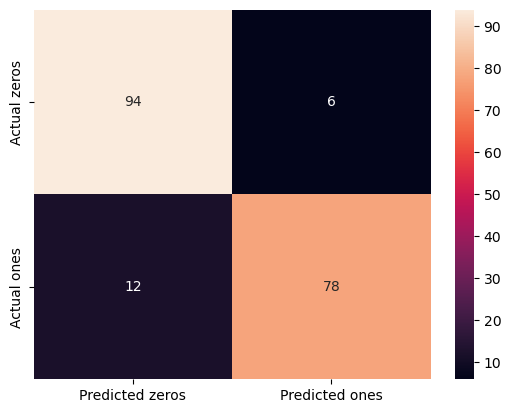

In [48]:
df_confusion_matrix_DTC = confusion_matrix(y_test, bestmodel_DTC.predict(X_test))

xlabels = ['Predicted zeros', 'Predicted ones']
ylabels = ['Actual zeros', 'Actual ones']
ax = sns.heatmap(df_confusion_matrix_DTC, annot = True, xticklabels = xlabels, yticklabels = ylabels)

plt.show()

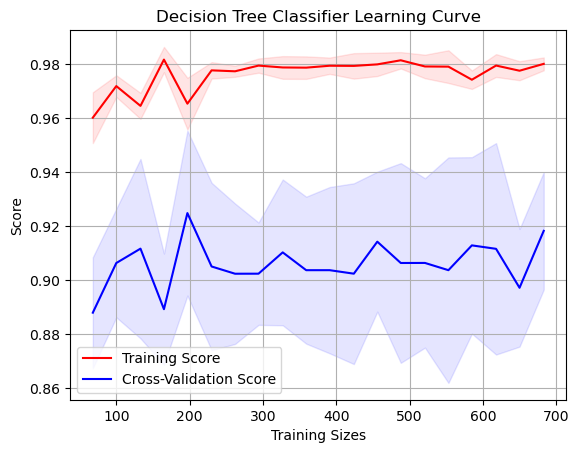

In [49]:
training_sizes = np.linspace(0.1, 1.0, 20)

training_sizes, training_score, test_score = learning_curve(
    bestmodel_DTC, X_train, y_train, cv = 10, train_sizes = training_sizes, scoring = 'accuracy'
)

training_score_mean = np.mean(training_score, axis = 1)
training_score_std = np.std(training_score, axis = 1)
test_score_mean = np.mean(test_score, axis = 1)
test_score_std = np.std(test_score, axis = 1)

plt.figure()

plt.title('Decision Tree Classifier Learning Curve')
plt.xlabel('Training Sizes')
plt.ylabel('Score')
plt.grid()

plt.plot(training_sizes, training_score_mean, color = 'r', label = 'Training Score')
plt.plot(training_sizes, test_score_mean, color = 'b', label = 'Cross-Validation Score')

plt.fill_between(
    training_sizes, training_score_mean - training_score_std, training_score_mean + training_score_std, alpha = 0.1, color = 'r'
)
plt.fill_between(
    training_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, alpha = 0.1, color = 'b'
)


plt.legend()
plt.show()

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4400/1262102498.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 0].values, fit = norm, ax = axes[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4400/1262102498.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mw

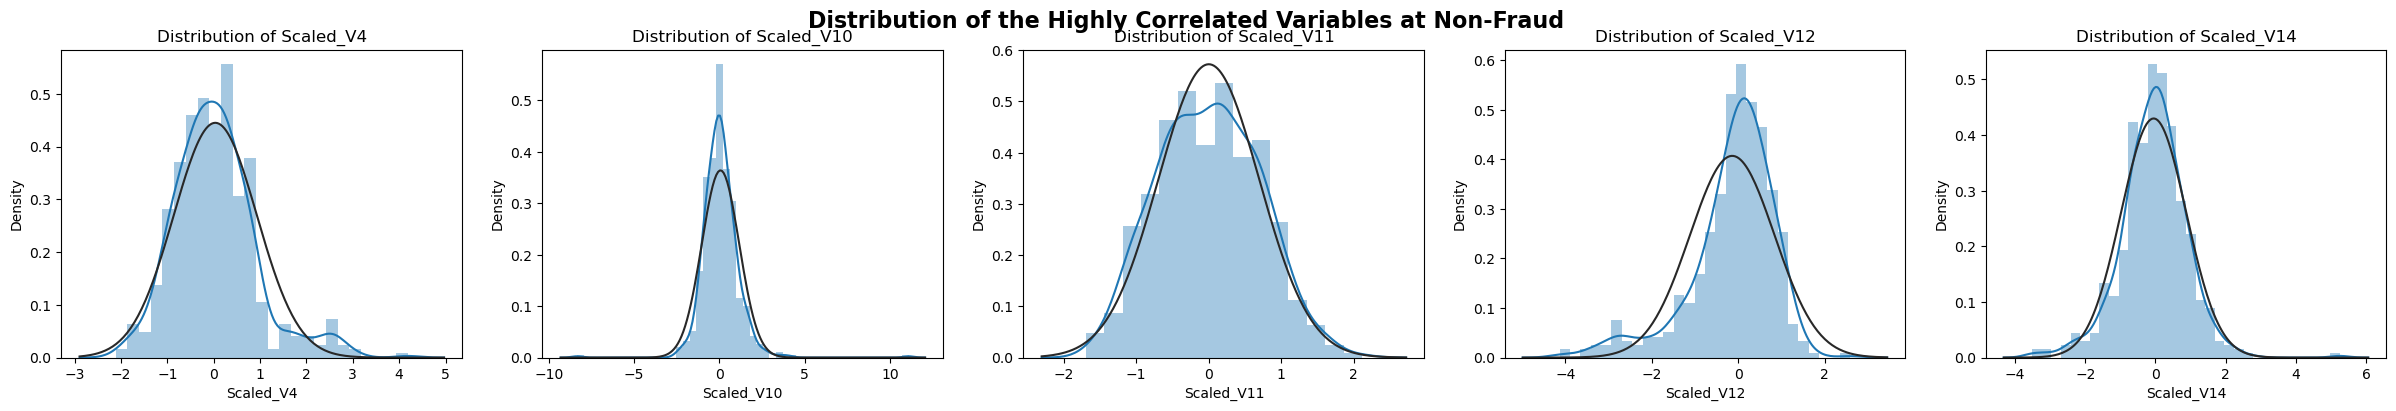

In [50]:
f, axes = plt.subplots(ncols = 5, figsize=(30, 4))
for i in range(5):
    sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 0].values, fit = norm, ax = axes[i])
    axes[i].set_title('Distribution of ' + outlier_indices[i])
    axes[i].set_xlabel(outlier_indices[i])
f.suptitle('Distribution of the Highly Correlated Variables at Non-Fraud', fontsize=16, fontweight = 'bold')
plt.show()

0.9293377805572928
0.9111462605429472


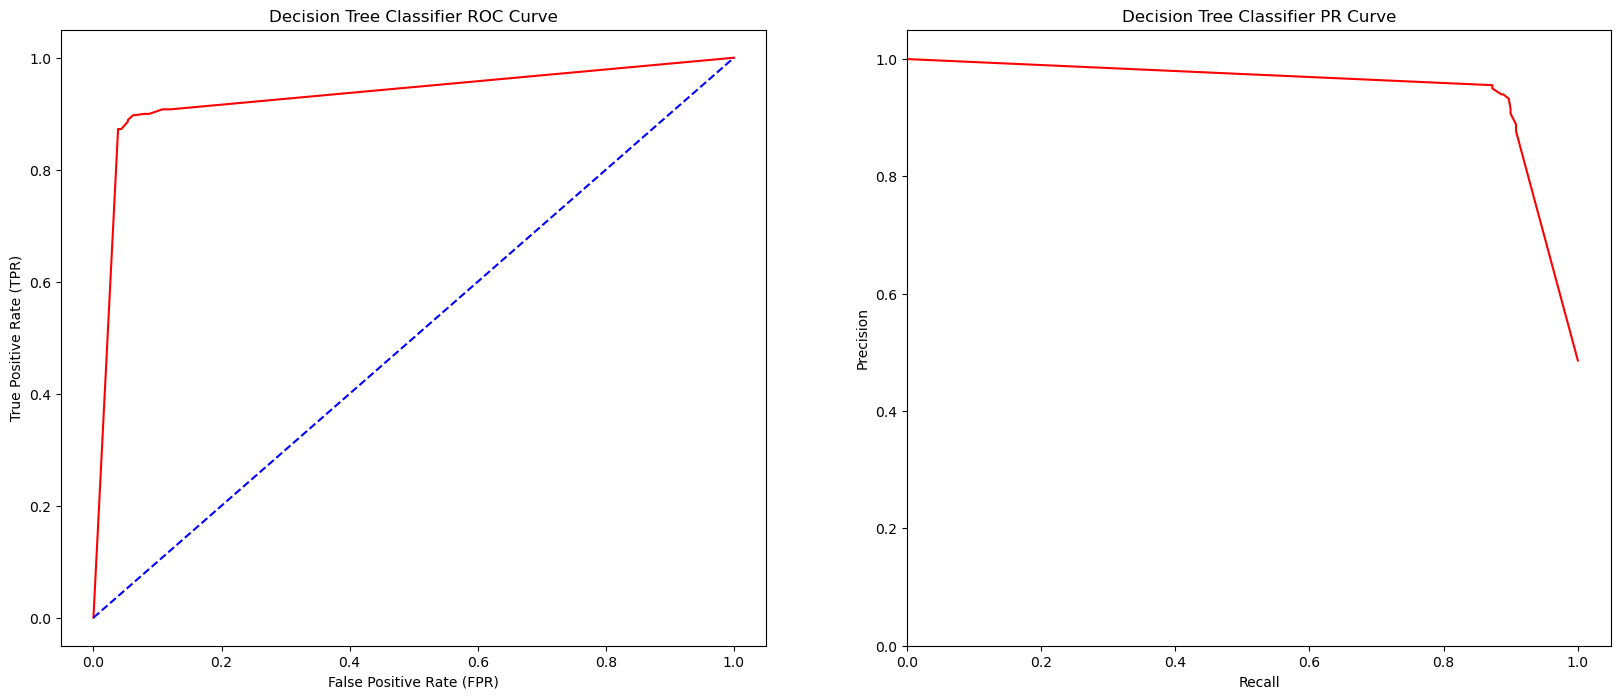

In [51]:
bestmodel_DTC_y_train_predicted = cross_val_predict(bestmodel_DTC, X_train, y_train, cv = 10, method = 'predict_proba')[:, 1]
bestmodel_ras_DTC = roc_auc_score(y_train, bestmodel_DTC_y_train_predicted)
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_train, bestmodel_DTC_y_train_predicted)
prs_DTC = average_precision_score(y_train, bestmodel_DTC_y_train_predicted)
precision, recall, _ = precision_recall_curve(y_train, bestmodel_DTC_y_train_predicted)
print(bestmodel_ras_DTC)
print(prs_DTC)
f, axes = plt.subplots(ncols=2, figsize = (20, 8))

axes[0].plot(fpr_logistic, tpr_logistic, color = 'r')
axes[0].plot([0, 1], [0, 1], color = 'b', linestyle = '--')
plt.xlim(-0.05, 1.05)
plt.ylim(0, 1.05)
axes[0].set_xlabel('False Positive Rate (FPR)')
axes[0].set_ylabel('True Positive Rate (TPR)')
axes[0].set_title('Decision Tree Classifier ROC Curve')


axes[1].plot(recall, precision, color = 'r')
plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Decision Tree Classifier PR Curve')

plt.show()

Comparing to the Logistic Regression, the DTC provides us with insight of how a decision being made and the relative importance among features. However, the overall scores for DTC is less than that in Logistic Regression.

# Conclusion
This project provide a method in performing logistic regression and decision tree classifier in the case of binary classification with an imbalanced dataset. From the basic information, we understand the skewness of the variables and the importance of rescaling. The low PR score calculated with logistic regression model on the imbalanced dataset makes the undersample essential in doing the following analysis. A balanced dataset with 50% fraud and 50% nonfraud instances is created. However, from the distribution of variables and correlation matrix of the balanced dataset, we see the necessarity of removing the outliers. After sufficient preparing the data, we deeply look into the logistic regression and decision tree classifier on the undersample. The logistic regression model found by grid search gives us high scores in training, cross-validation, ROC AUC, and PR score. Also, the learning curve does not show the pattern of overfitting. The decision tree classifier provides us with visualised insight of how decision being made and indicates the relative importance of variables in the model.

There are more things that can be implemented to improved the efficiency. For example, we could pick a more accurate way of undersampling, such as near-missing undersampling or condensed nearest neighbor, rather than what we have done. These algorithms will be more effective as they capture more information from the original dataset. We could also perform other classification algorithms, such as Knears neighbors. These classifiers may provide us more insight about the dataset. It is also worth noting that we need to control the runtime for our algorithms, since the runtimes for the above algorithms are long. This can be done by using methods like feature engineering, batch processing, and other runtime control methods.